In [1]:
import os
import numpy as np
import torch
from torch import Tensor
from torch.nn.parameter import Parameter
from torch.autograd import Variable
import torch.nn.functional as F
from lib.dataset_custom import KernDataset,DatasetSplit
from lib.model import ScoreModel
from lib.opt import optimize
from lib.CrossValidation import CrossValidator
from lib.config import corpora_for_classification_all_composers as default_corpora
import lib.media as media

In [2]:
os.environ['CUDA_DEVICE_ORDER']='PCI_BUS_ID'   # see issue #152
os.environ['CUDA_VISIBLE_DEVICES']='2'
#os.environ['CUDA_LAUNCH_BLOCKING']='1'

checkpoint_dir = 'histogram_500'
context = 500
corpora = tuple(default_corpora)

In [3]:
import sys
class Convnet(ScoreModel):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def define_graph(self, debug=False):      
        self.w_e = Parameter(Tensor(78, self.composers))
        self.w_t = Parameter(Tensor(55, self.composers))
        self.bias = Parameter(Tensor(self.composers))
    
    def forward(self, x):
        e,t,_,_ = x
        x_e = e.mean(1).mean(1).mean(1) 
        x_t = t.mean(1).mean(1).mean(1)
        return torch.mm(x_e, self.w_e) + torch.mm(x_t, self.w_t) + self.bias[None, :].expand(e.shape[0], -1)

In [4]:
validator = CrossValidator(Convnet, corpora, is_patches_model=True, patience=50, batch_size=64)

---------------------------------------------
---------------------------------------------
Fold 0
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31 iterations/epoch.
acc_tr	acc_ts	iter	loss_tr	loss_ts	time	utime
1.00    0.86    0       4.33    4.33    5.54    3.60    
33.50   32.19   31      4.00    4.02    10.45   3.33    
31.00   31.33   62      3.78    3.69    10.35   3.10    
32.00   29.61   93      3.45    3.49    10.38   3.71    
34.00   30.90   124     3.39    3.36    10.05   3.39    
36.00   33.05   155     3.24    3.26    10.29   3.50    
37.00   36.05   186     3.21    3.17    10.74   3.43    
38.50   36.91   217     3.03    3.11    10.51   3.36    
39.50   39.06   248     2.9

61.50   59.66   4185    1.58    1.86    12.78   4.41    
61.50   59.66   4216    1.59    1.86    13.03   4.32    
61.00   59.66   4247    1.63    1.86    13.04   4.64    
62.00   59.66   4278    1.71    1.85    13.33   4.59    
62.00   59.66   4309    1.65    1.85    13.66   4.20    
61.00   59.66   4340    1.57    1.85    12.80   4.26    
62.00   59.66   4371    1.57    1.84    13.42   4.06    
62.00   59.66   4402    1.60    1.84    13.12   4.49    
61.50   59.66   4433    1.75    1.84    13.69   4.25    
62.00   59.66   4464    1.58    1.84    13.10   4.24    
61.50   59.66   4495    1.58    1.84    14.07   4.42    
61.50   59.66   4526    1.61    1.83    13.23   4.14    
61.00   59.66   4557    1.53    1.84    13.57   3.98    
61.50   59.66   4588    1.55    1.83    13.24   4.45    
61.50   59.66   4619    1.59    1.83    13.16   4.38    
62.00   59.66   4650    1.59    1.83    12.96   3.96    
61.50   59.66   4681    1.61    1.83    12.65   4.19    
61.50   60.09   4712    1.63   

65.50   62.23   8649    1.39    1.66    12.33   3.99    
65.50   61.80   8680    1.49    1.66    12.40   3.86    
Finished
**************
Test accuracy :  0.6217391304347826


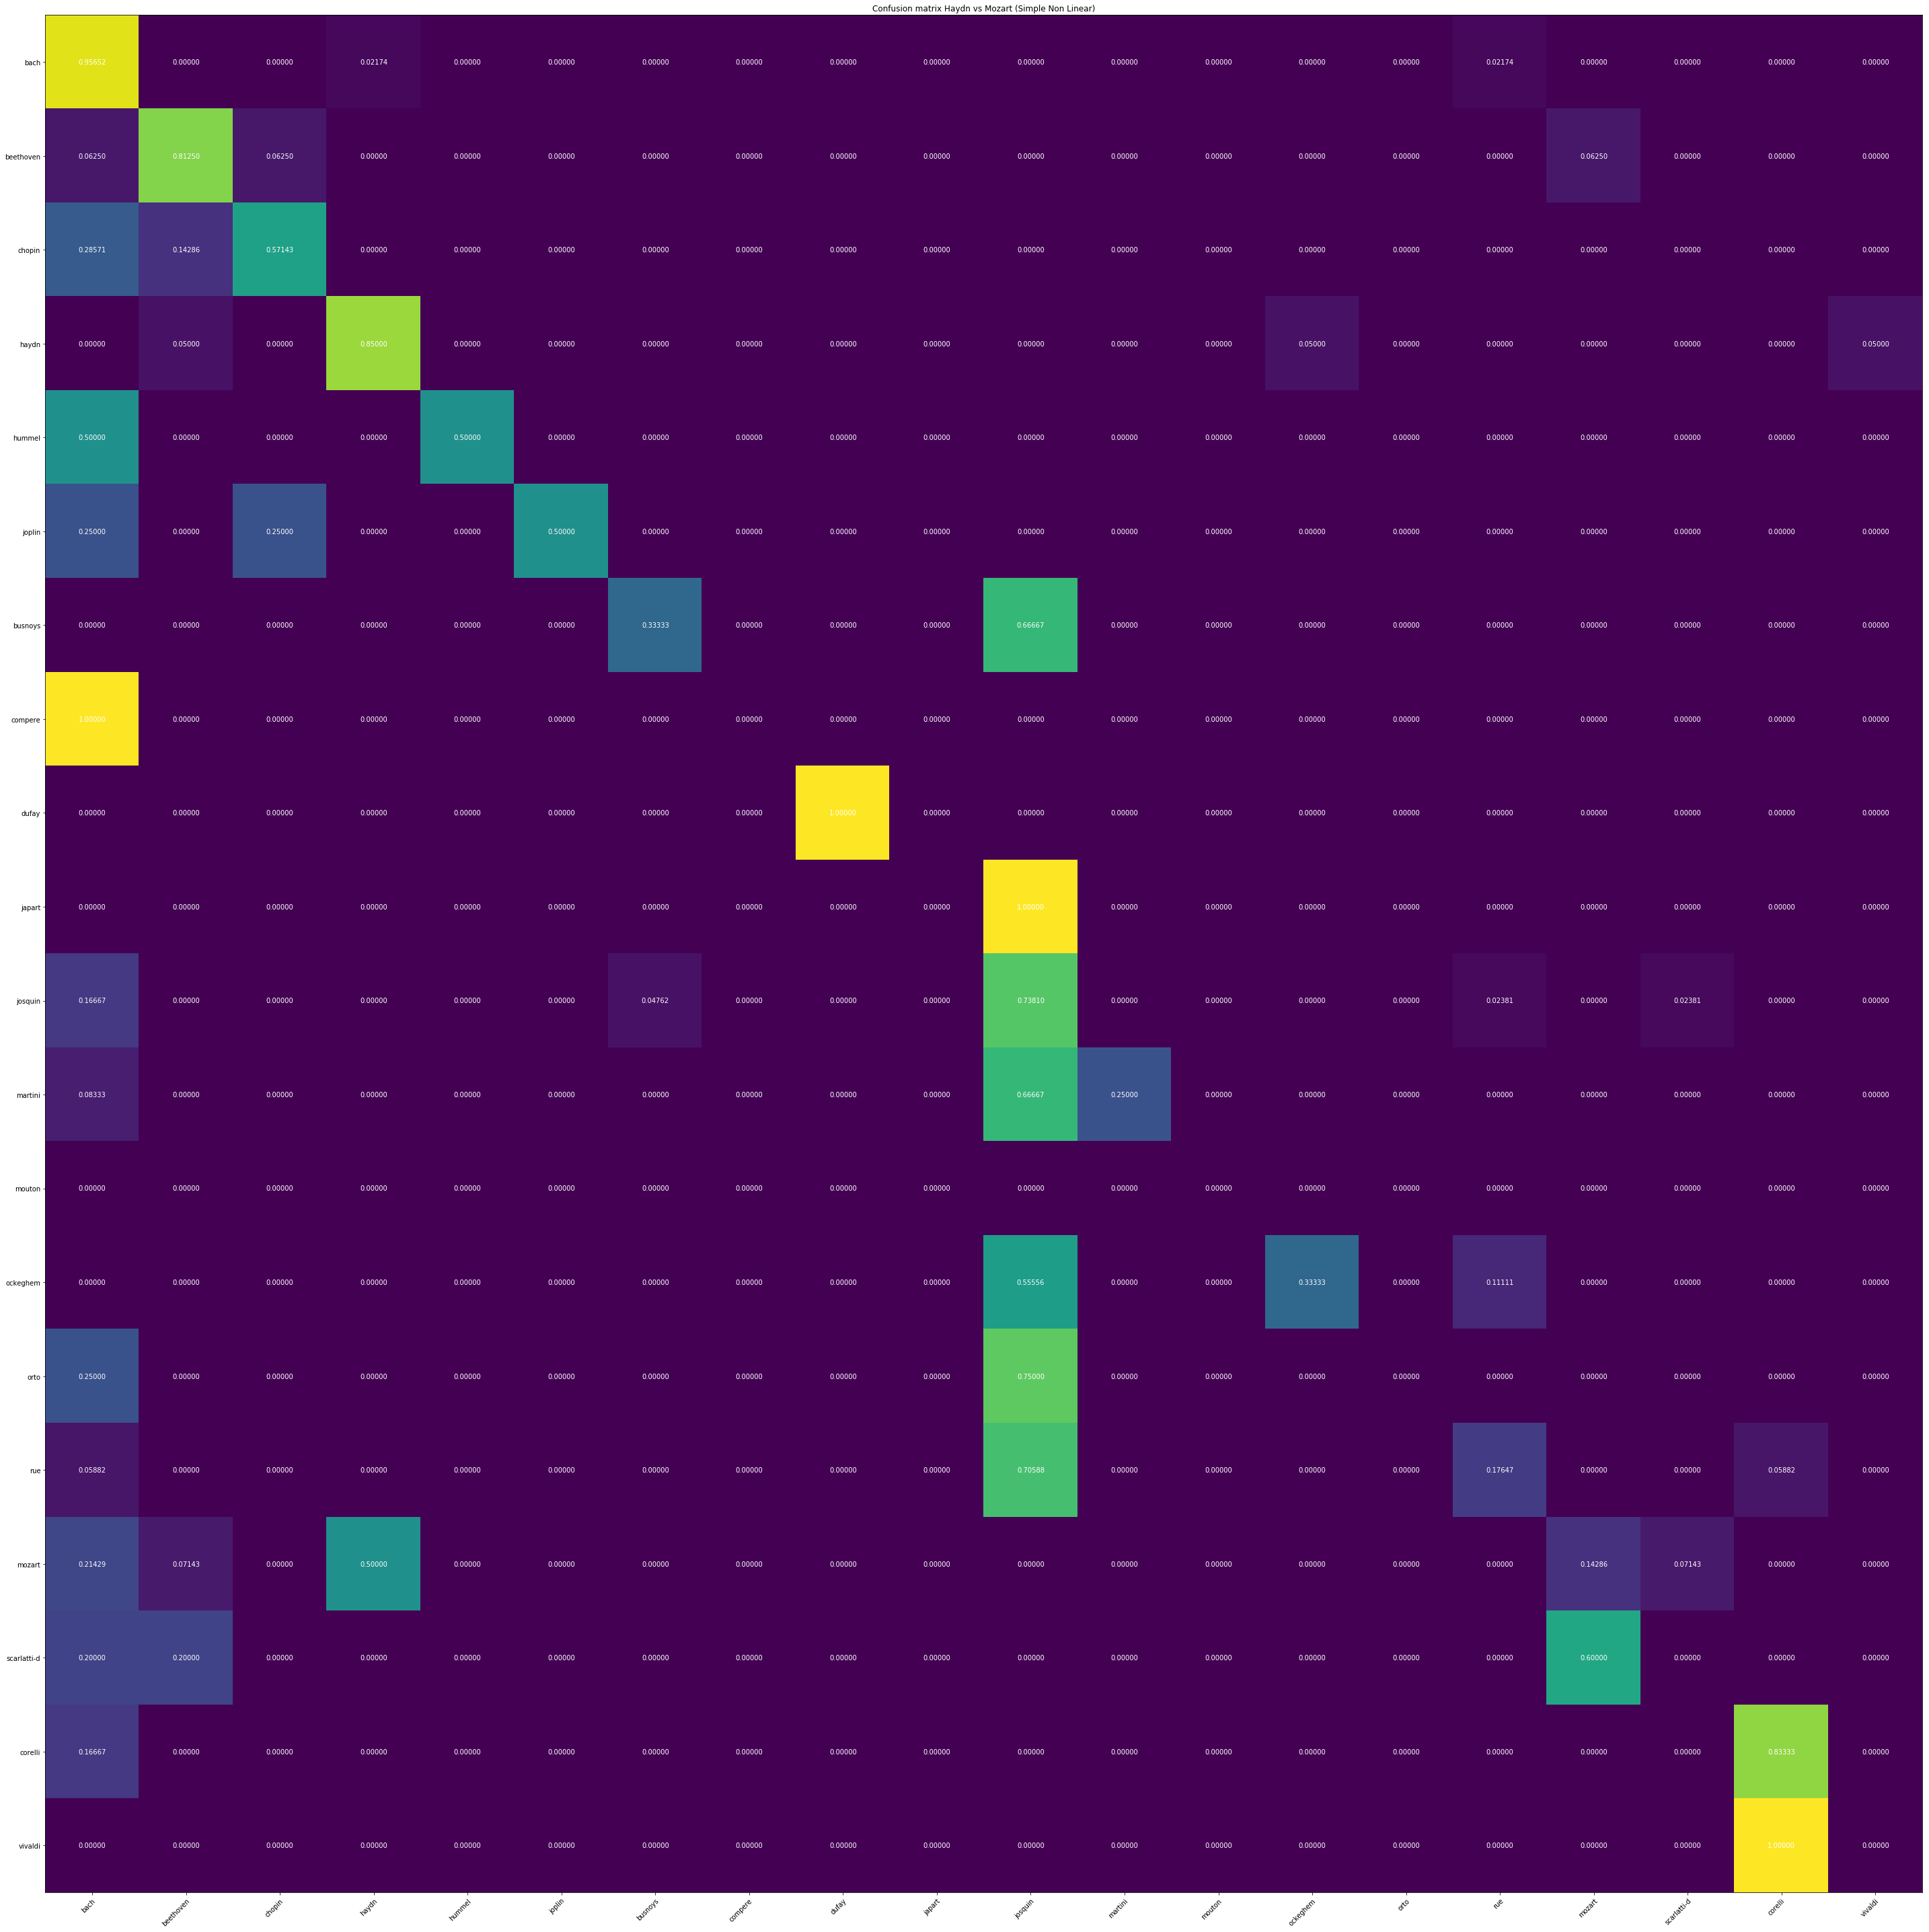

bach 44 / 46 = 0.9565217391304348
beethoven 13 / 16 = 0.8125
busnoys 2 / 6 = 0.3333333333333333
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 15 / 18 = 0.8333333333333334
dufay 3 / 3 = 1.0
haydn 17 / 20 = 0.85
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 2 / 4 = 0.5
josquin 31 / 42 = 0.7380952380952381
martini 3 / 12 = 0.25
mozart 2 / 14 = 0.14285714285714285
ockeghem 3 / 9 = 0.3333333333333333
orto 0 / 4 = 0.0
rue 3 / 17 = 0.17647058823529413
scarlatti-d 0 / 5 = 0.0
vivaldi 0 / 1 = 0.0
143 230 0.6217391304347826
---------------------------------------------
---------------------------------------------
Fold 1
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31 iterations/e

62.00   61.90   3906    1.65    1.79    20.99   6.48    
63.00   61.47   3937    1.81    1.79    20.16   6.16    
63.50   62.34   3968    1.71    1.79    20.17   6.24    
63.50   62.34   3999    1.82    1.78    20.44   5.99    
63.00   62.34   4030    1.85    1.78    20.65   6.98    
63.50   61.90   4061    1.86    1.78    19.63   6.30    
63.50   62.34   4092    1.59    1.78    21.89   6.86    
64.50   61.90   4123    1.62    1.77    19.91   6.58    
63.00   62.34   4154    1.79    1.77    19.73   6.10    
63.50   62.34   4185    1.85    1.77    20.27   6.70    
63.00   61.90   4216    1.56    1.76    20.44   6.93    
63.50   61.90   4247    1.67    1.76    21.09   6.44    
63.50   63.20   4278    1.74    1.76    20.32   6.84    
64.50   61.90   4309    1.94    1.76    20.19   6.50    
64.00   62.77   4340    1.61    1.76    19.95   5.98    
64.00   61.47   4371    1.76    1.75    18.98   6.95    
63.50   61.04   4402    1.72    1.75    19.88   7.02    
64.00   61.90   4433    1.54   

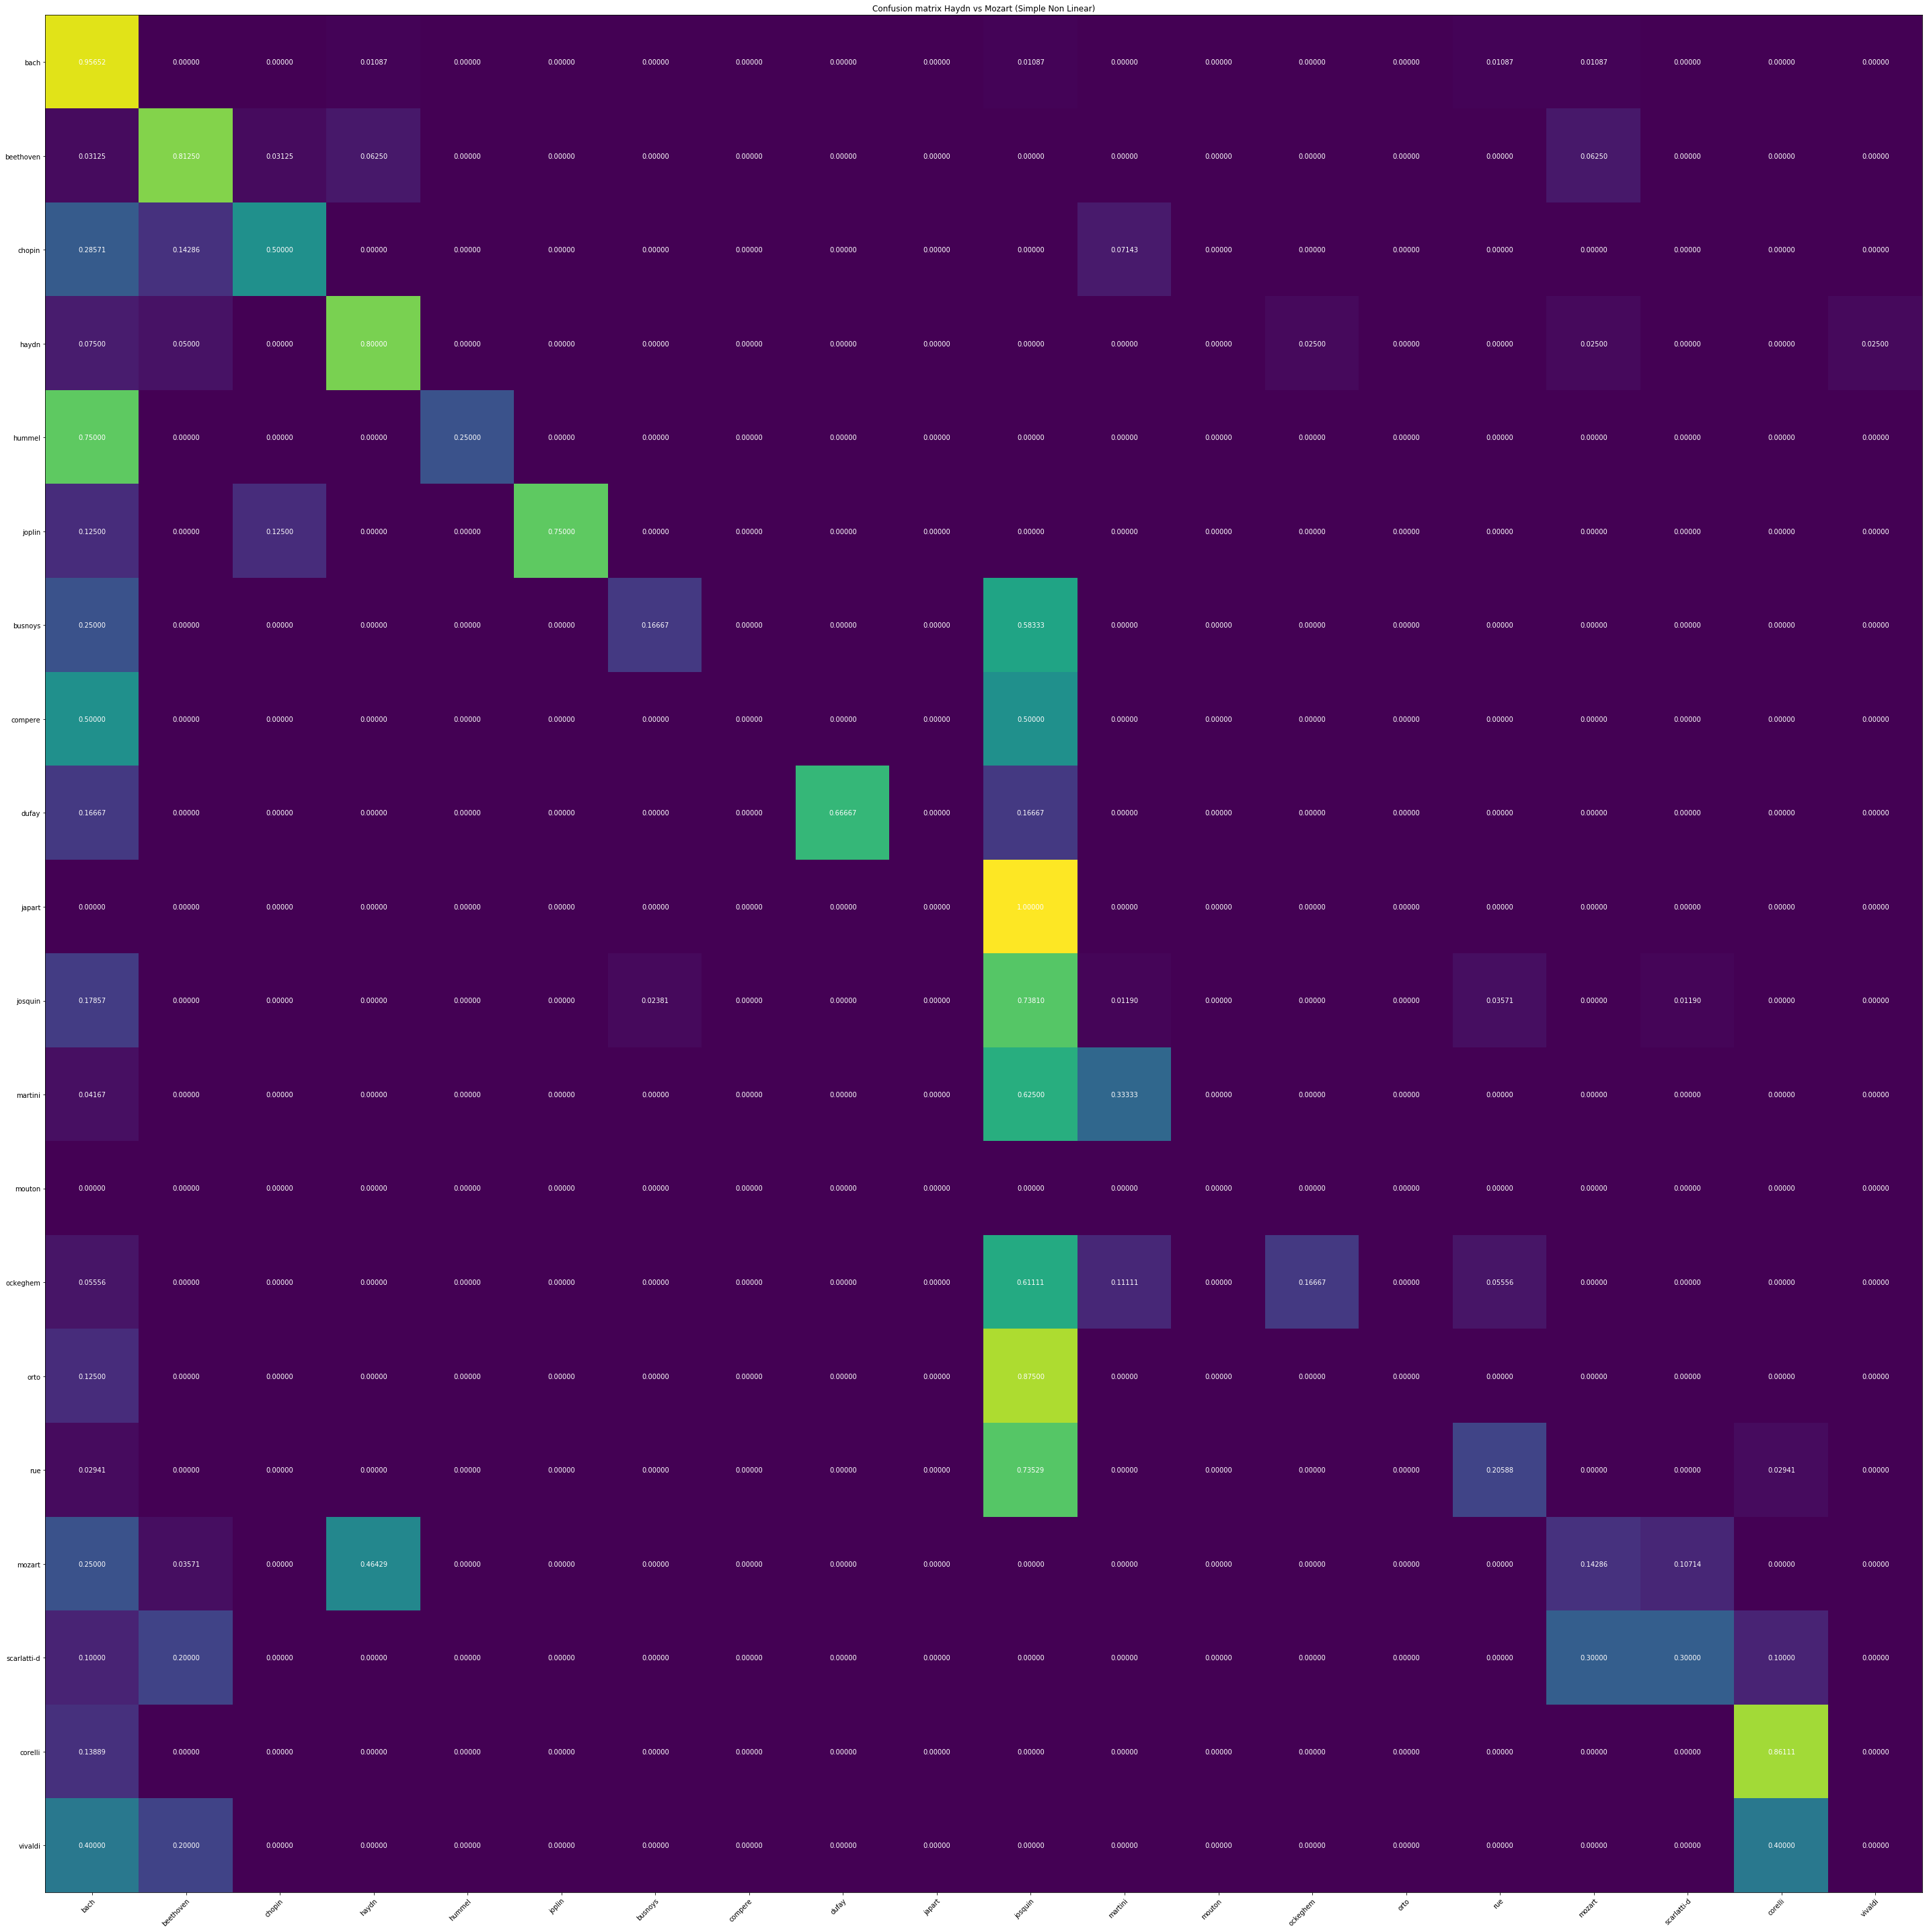

bach 44 / 46 = 0.9565217391304348
beethoven 13 / 16 = 0.8125
busnoys 0 / 6 = 0.0
chopin 3 / 7 = 0.42857142857142855
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 1 / 3 = 0.3333333333333333
haydn 15 / 20 = 0.75
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 31 / 42 = 0.7380952380952381
martini 5 / 12 = 0.4166666666666667
mozart 2 / 14 = 0.14285714285714285
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 4 / 17 = 0.23529411764705882
scarlatti-d 3 / 5 = 0.6
vivaldi 0 / 4 = 0.0
141 233 0.6051502145922747
---------------------------------------------
---------------------------------------------
Fold 2
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31 iterations/e

62.00   61.54   3906    1.52    1.79    15.62   5.13    
62.50   61.11   3937    1.80    1.79    15.76   5.38    
62.50   61.11   3968    1.68    1.79    15.89   5.13    
62.50   61.11   3999    1.87    1.79    15.49   5.08    
62.00   61.54   4030    1.60    1.78    15.59   5.30    
62.00   61.54   4061    1.76    1.78    15.34   5.06    
62.50   62.39   4092    1.64    1.78    15.34   5.38    
63.50   60.68   4123    1.66    1.77    15.07   4.77    
63.50   61.54   4154    1.67    1.77    15.75   5.25    
63.50   61.11   4185    1.54    1.77    15.47   5.19    
62.50   62.39   4216    1.83    1.77    15.71   5.01    
63.50   61.11   4247    1.65    1.76    15.31   5.37    
63.50   61.54   4278    1.77    1.76    15.76   4.99    
63.00   61.97   4309    1.61    1.75    15.87   5.05    
63.50   63.25   4340    1.65    1.75    14.61   4.99    
63.00   61.97   4371    1.68    1.75    13.45   4.73    
63.50   61.54   4402    1.75    1.75    13.64   4.37    
63.00   63.68   4433    1.79   

66.50   66.24   8370    1.40    1.53    12.91   4.53    
66.50   66.24   8401    1.52    1.53    13.43   4.43    
67.00   66.24   8432    1.34    1.53    13.01   4.17    
66.50   66.24   8463    1.51    1.53    13.79   4.28    
66.50   66.24   8494    1.47    1.53    13.51   4.38    
67.00   66.24   8525    1.66    1.53    13.17   4.40    
67.00   66.24   8556    1.37    1.53    13.30   4.42    
67.00   66.24   8587    1.33    1.53    12.93   4.41    
66.50   66.24   8618    1.31    1.53    12.91   4.20    
67.00   66.24   8649    1.39    1.53    13.26   4.35    
67.00   66.24   8680    1.43    1.52    14.00   4.31    
Finished
**************
Test accuracy :  0.6536796536796536


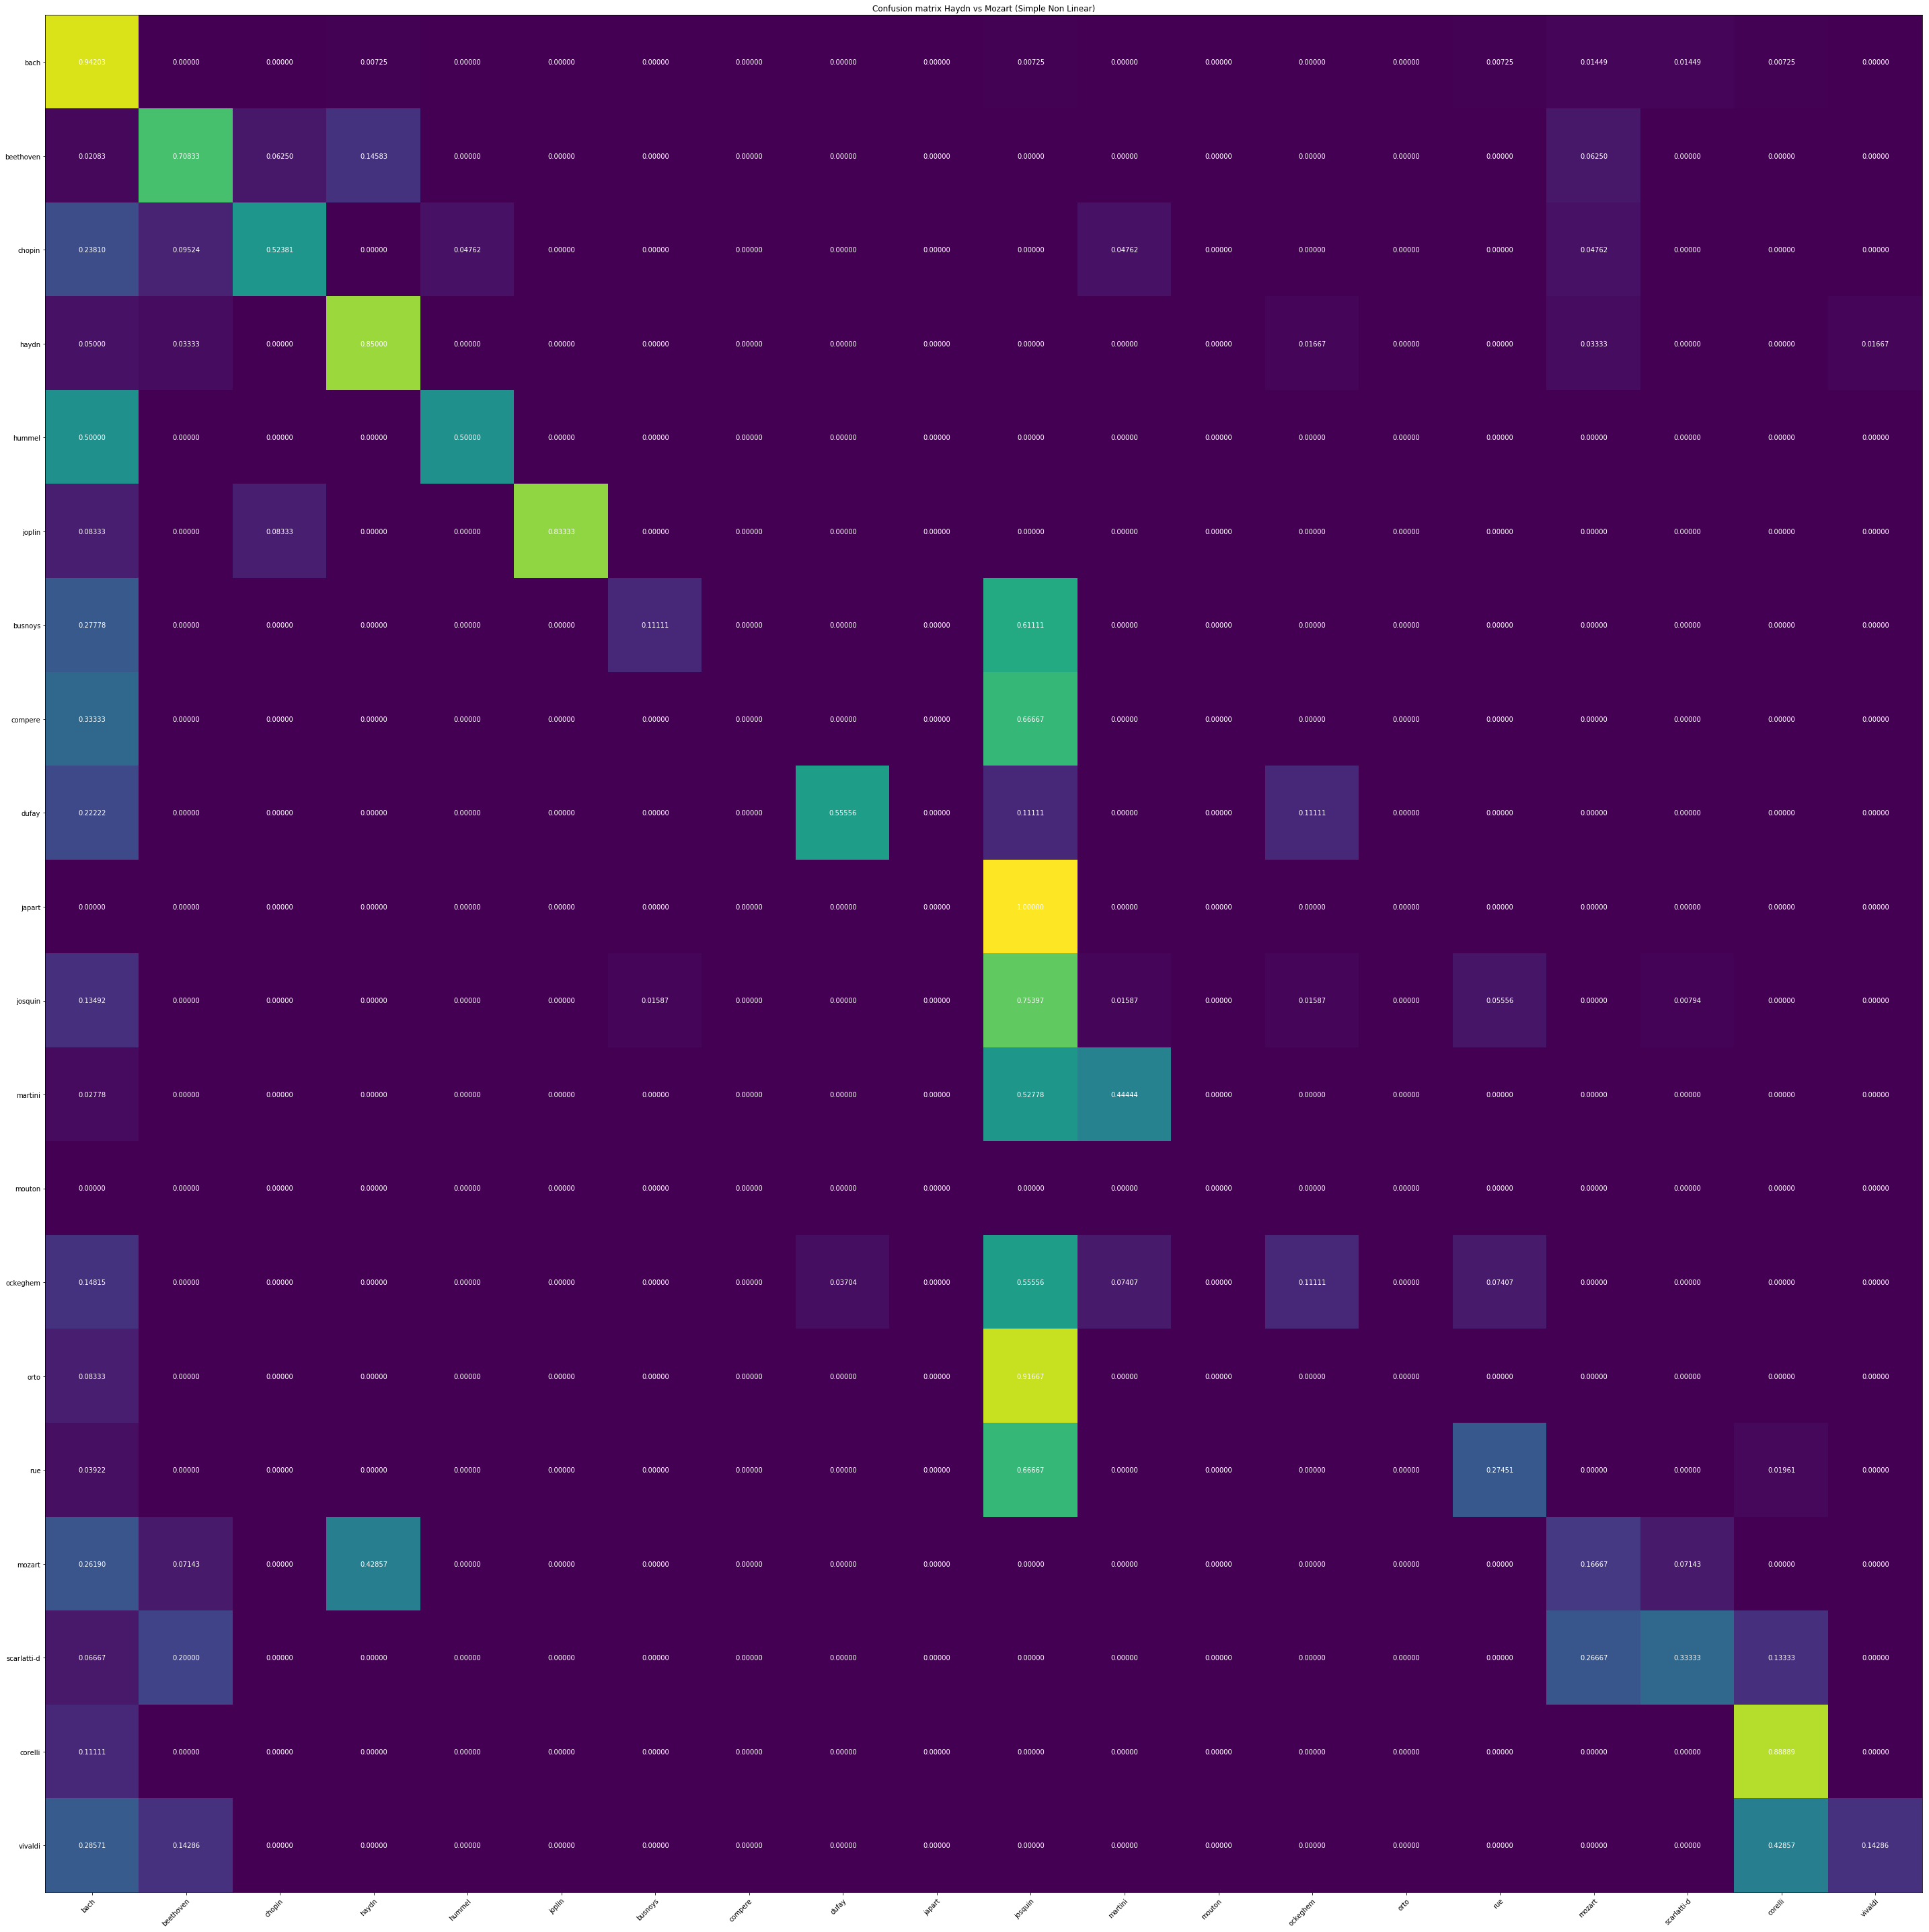

bach 42 / 46 = 0.9130434782608695
beethoven 8 / 16 = 0.5
busnoys 0 / 6 = 0.0
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 1 / 3 = 0.3333333333333333
haydn 19 / 20 = 0.95
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 33 / 42 = 0.7857142857142857
martini 8 / 12 = 0.6666666666666666
mozart 3 / 14 = 0.21428571428571427
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 7 / 17 = 0.4117647058823529
scarlatti-d 2 / 5 = 0.4
vivaldi 1 / 2 = 0.5
151 231 0.6536796536796536
---------------------------------------------
---------------------------------------------
Fold 3
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31 iterations/epoch.


64.50   59.31   3906    1.47    1.88    11.50   3.63    
64.00   58.87   3937    1.74    1.88    11.49   4.04    
64.50   59.74   3968    1.57    1.87    11.38   3.71    
64.50   58.44   3999    1.75    1.87    10.89   3.77    
65.00   59.74   4030    1.53    1.87    11.04   4.16    
64.50   58.01   4061    1.66    1.87    11.73   3.71    
64.50   60.17   4092    1.61    1.86    10.92   3.65    
65.00   59.74   4123    1.65    1.86    11.07   3.81    
65.00   59.74   4154    1.68    1.86    10.97   3.73    
65.00   59.74   4185    1.55    1.85    10.33   3.71    
65.00   59.74   4216    1.87    1.85    10.89   3.98    
65.00   58.44   4247    1.61    1.85    11.17   3.88    
64.50   58.44   4278    1.45    1.85    11.64   3.49    
65.00   61.04   4309    1.49    1.84    11.00   3.73    
65.00   59.74   4340    1.63    1.84    11.05   3.70    
65.00   59.31   4371    1.52    1.84    11.34   3.44    
65.00   61.04   4402    1.59    1.84    11.81   3.54    
65.00   59.74   4433    1.64   

68.50   64.07   8370    1.44    1.63    10.90   3.65    
68.50   63.64   8401    1.37    1.63    11.63   3.86    
68.50   63.64   8432    1.33    1.63    11.08   3.77    
69.00   63.64   8463    1.25    1.62    10.97   3.76    
68.50   63.64   8494    1.36    1.62    10.77   3.88    
68.50   63.64   8525    1.39    1.62    11.01   3.79    
69.00   63.20   8556    1.28    1.62    11.13   3.55    
69.00   63.64   8587    1.31    1.62    10.91   3.84    
69.50   63.64   8618    1.34    1.62    11.77   3.66    
69.00   64.07   8649    1.45    1.62    11.26   3.63    
69.00   63.20   8680    1.19    1.62    11.49   3.30    
69.50   63.64   8711    1.31    1.61    11.21   3.72    
69.50   63.64   8742    1.41    1.62    11.12   3.62    
69.50   63.64   8773    1.19    1.61    10.90   3.66    
69.50   64.07   8804    1.30    1.61    11.54   3.82    
69.00   63.64   8835    1.30    1.61    11.42   3.55    
69.00   63.20   8866    1.32    1.61    10.82   3.68    
69.50   63.64   8897    1.34   

70.50   65.37   12834   1.34    1.52    10.68   3.82    
70.00   64.94   12865   1.16    1.52    11.22   3.76    
70.50   65.37   12896   1.22    1.52    11.18   3.68    
70.50   65.37   12927   1.45    1.52    11.09   3.90    
70.50   65.37   12958   1.28    1.52    11.33   3.93    
70.50   65.37   12989   1.19    1.52    11.60   3.82    
70.50   65.80   13020   1.16    1.52    11.13   3.89    
70.50   65.37   13051   1.35    1.52    11.60   3.86    
70.50   65.80   13082   1.17    1.51    11.76   3.85    
70.50   66.23   13113   1.07    1.51    10.37   3.60    
70.50   64.94   13144   1.26    1.51    11.38   3.72    
70.50   65.37   13175   1.22    1.51    11.58   3.65    
70.50   65.37   13206   1.16    1.51    11.82   3.78    
70.50   64.94   13237   1.16    1.51    11.17   3.91    
70.50   65.37   13268   1.50    1.51    11.38   3.89    
70.50   66.23   13299   1.27    1.51    10.64   3.79    
70.50   64.94   13330   1.34    1.51    10.88   3.63    
70.50   65.37   13361   1.21   

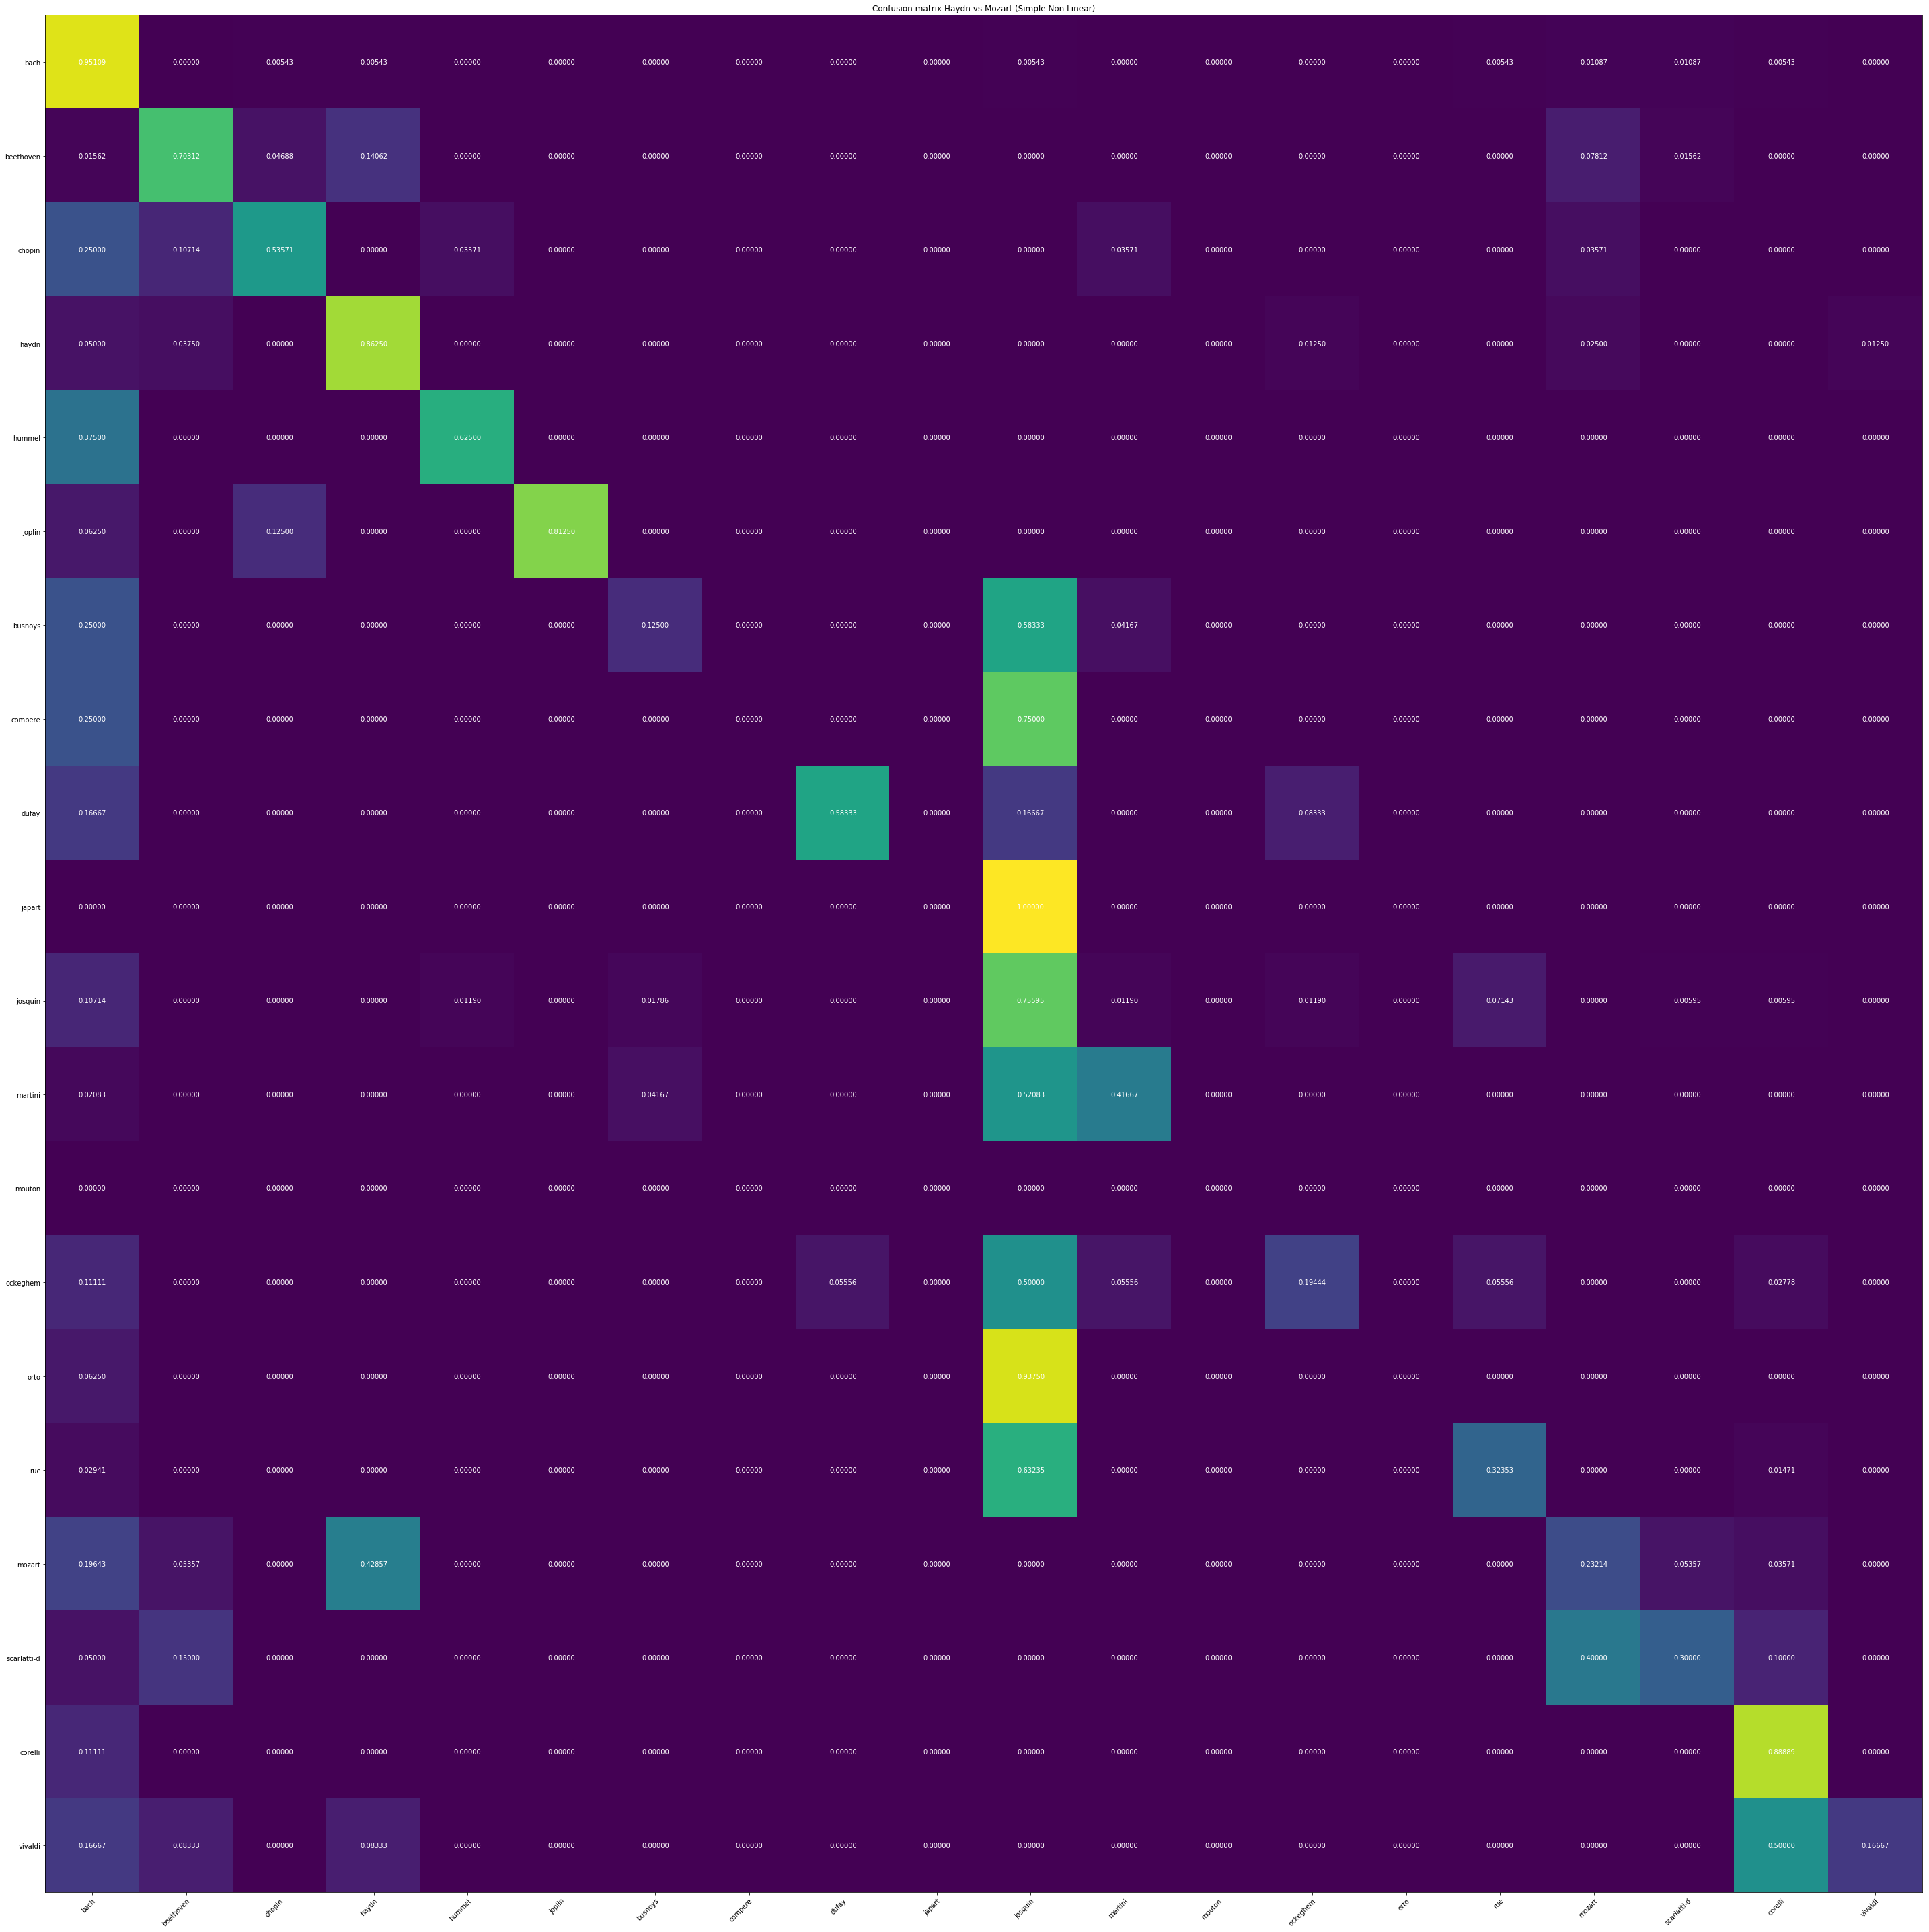

bach 45 / 46 = 0.9782608695652174
beethoven 11 / 16 = 0.6875
busnoys 1 / 6 = 0.16666666666666666
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 2 / 3 = 0.6666666666666666
haydn 18 / 20 = 0.9
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 3 / 4 = 0.75
josquin 32 / 42 = 0.7619047619047619
martini 4 / 12 = 0.3333333333333333
mozart 6 / 14 = 0.42857142857142855
ockeghem 4 / 9 = 0.4444444444444444
orto 0 / 4 = 0.0
rue 8 / 17 = 0.47058823529411764
scarlatti-d 1 / 5 = 0.2
vivaldi 1 / 5 = 0.2
158 234 0.6752136752136753
---------------------------------------------
---------------------------------------------
Fold 4
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiat

62.50   57.51   3875    1.85    1.91    10.62   3.75    
62.50   57.94   3906    1.65    1.91    11.51   3.48    
63.00   57.08   3937    1.73    1.91    11.97   3.72    
62.50   57.94   3968    1.78    1.90    11.23   3.91    
62.50   57.51   3999    1.65    1.90    11.29   3.69    
63.50   57.51   4030    1.66    1.90    11.07   3.68    
62.00   57.51   4061    1.65    1.90    11.53   3.38    
63.50   57.51   4092    1.67    1.89    11.29   3.60    
62.50   57.94   4123    1.56    1.89    11.18   3.66    
62.50   57.51   4154    1.55    1.89    11.14   3.66    
63.50   57.51   4185    1.66    1.89    11.58   3.53    
62.50   57.51   4216    1.59    1.88    11.01   3.90    
63.00   57.94   4247    1.59    1.88    10.82   3.59    
63.50   58.37   4278    1.65    1.88    11.29   3.66    
63.50   58.37   4309    1.70    1.88    11.03   3.82    
62.50   57.51   4340    1.59    1.87    11.94   3.62    
63.50   57.51   4371    1.69    1.87    11.40   3.62    
62.00   57.51   4402    1.60   

67.50   63.09   8339    1.27    1.70    10.75   3.60    
67.00   63.95   8370    1.39    1.70    11.57   4.04    
67.00   63.09   8401    1.33    1.70    11.38   3.78    
67.50   63.09   8432    1.30    1.70    11.09   3.45    
67.00   63.52   8463    1.24    1.70    11.27   3.64    
67.50   63.52   8494    1.31    1.69    11.15   3.57    
67.00   62.66   8525    1.37    1.70    11.36   3.53    
67.00   63.95   8556    1.35    1.69    11.31   3.30    
67.50   63.95   8587    1.46    1.70    11.88   3.80    
67.50   63.09   8618    1.58    1.69    11.12   3.69    
68.00   63.52   8649    1.41    1.69    11.72   3.63    
67.50   63.52   8680    1.36    1.69    11.13   3.67    
67.50   63.52   8711    1.37    1.69    11.92   3.56    
67.00   62.23   8742    1.39    1.69    11.81   3.62    
67.50   63.95   8773    1.26    1.69    10.65   3.72    
67.50   63.52   8804    1.28    1.69    11.04   3.78    
67.50   63.95   8835    1.30    1.69    11.43   3.75    
67.50   63.52   8866    1.30   

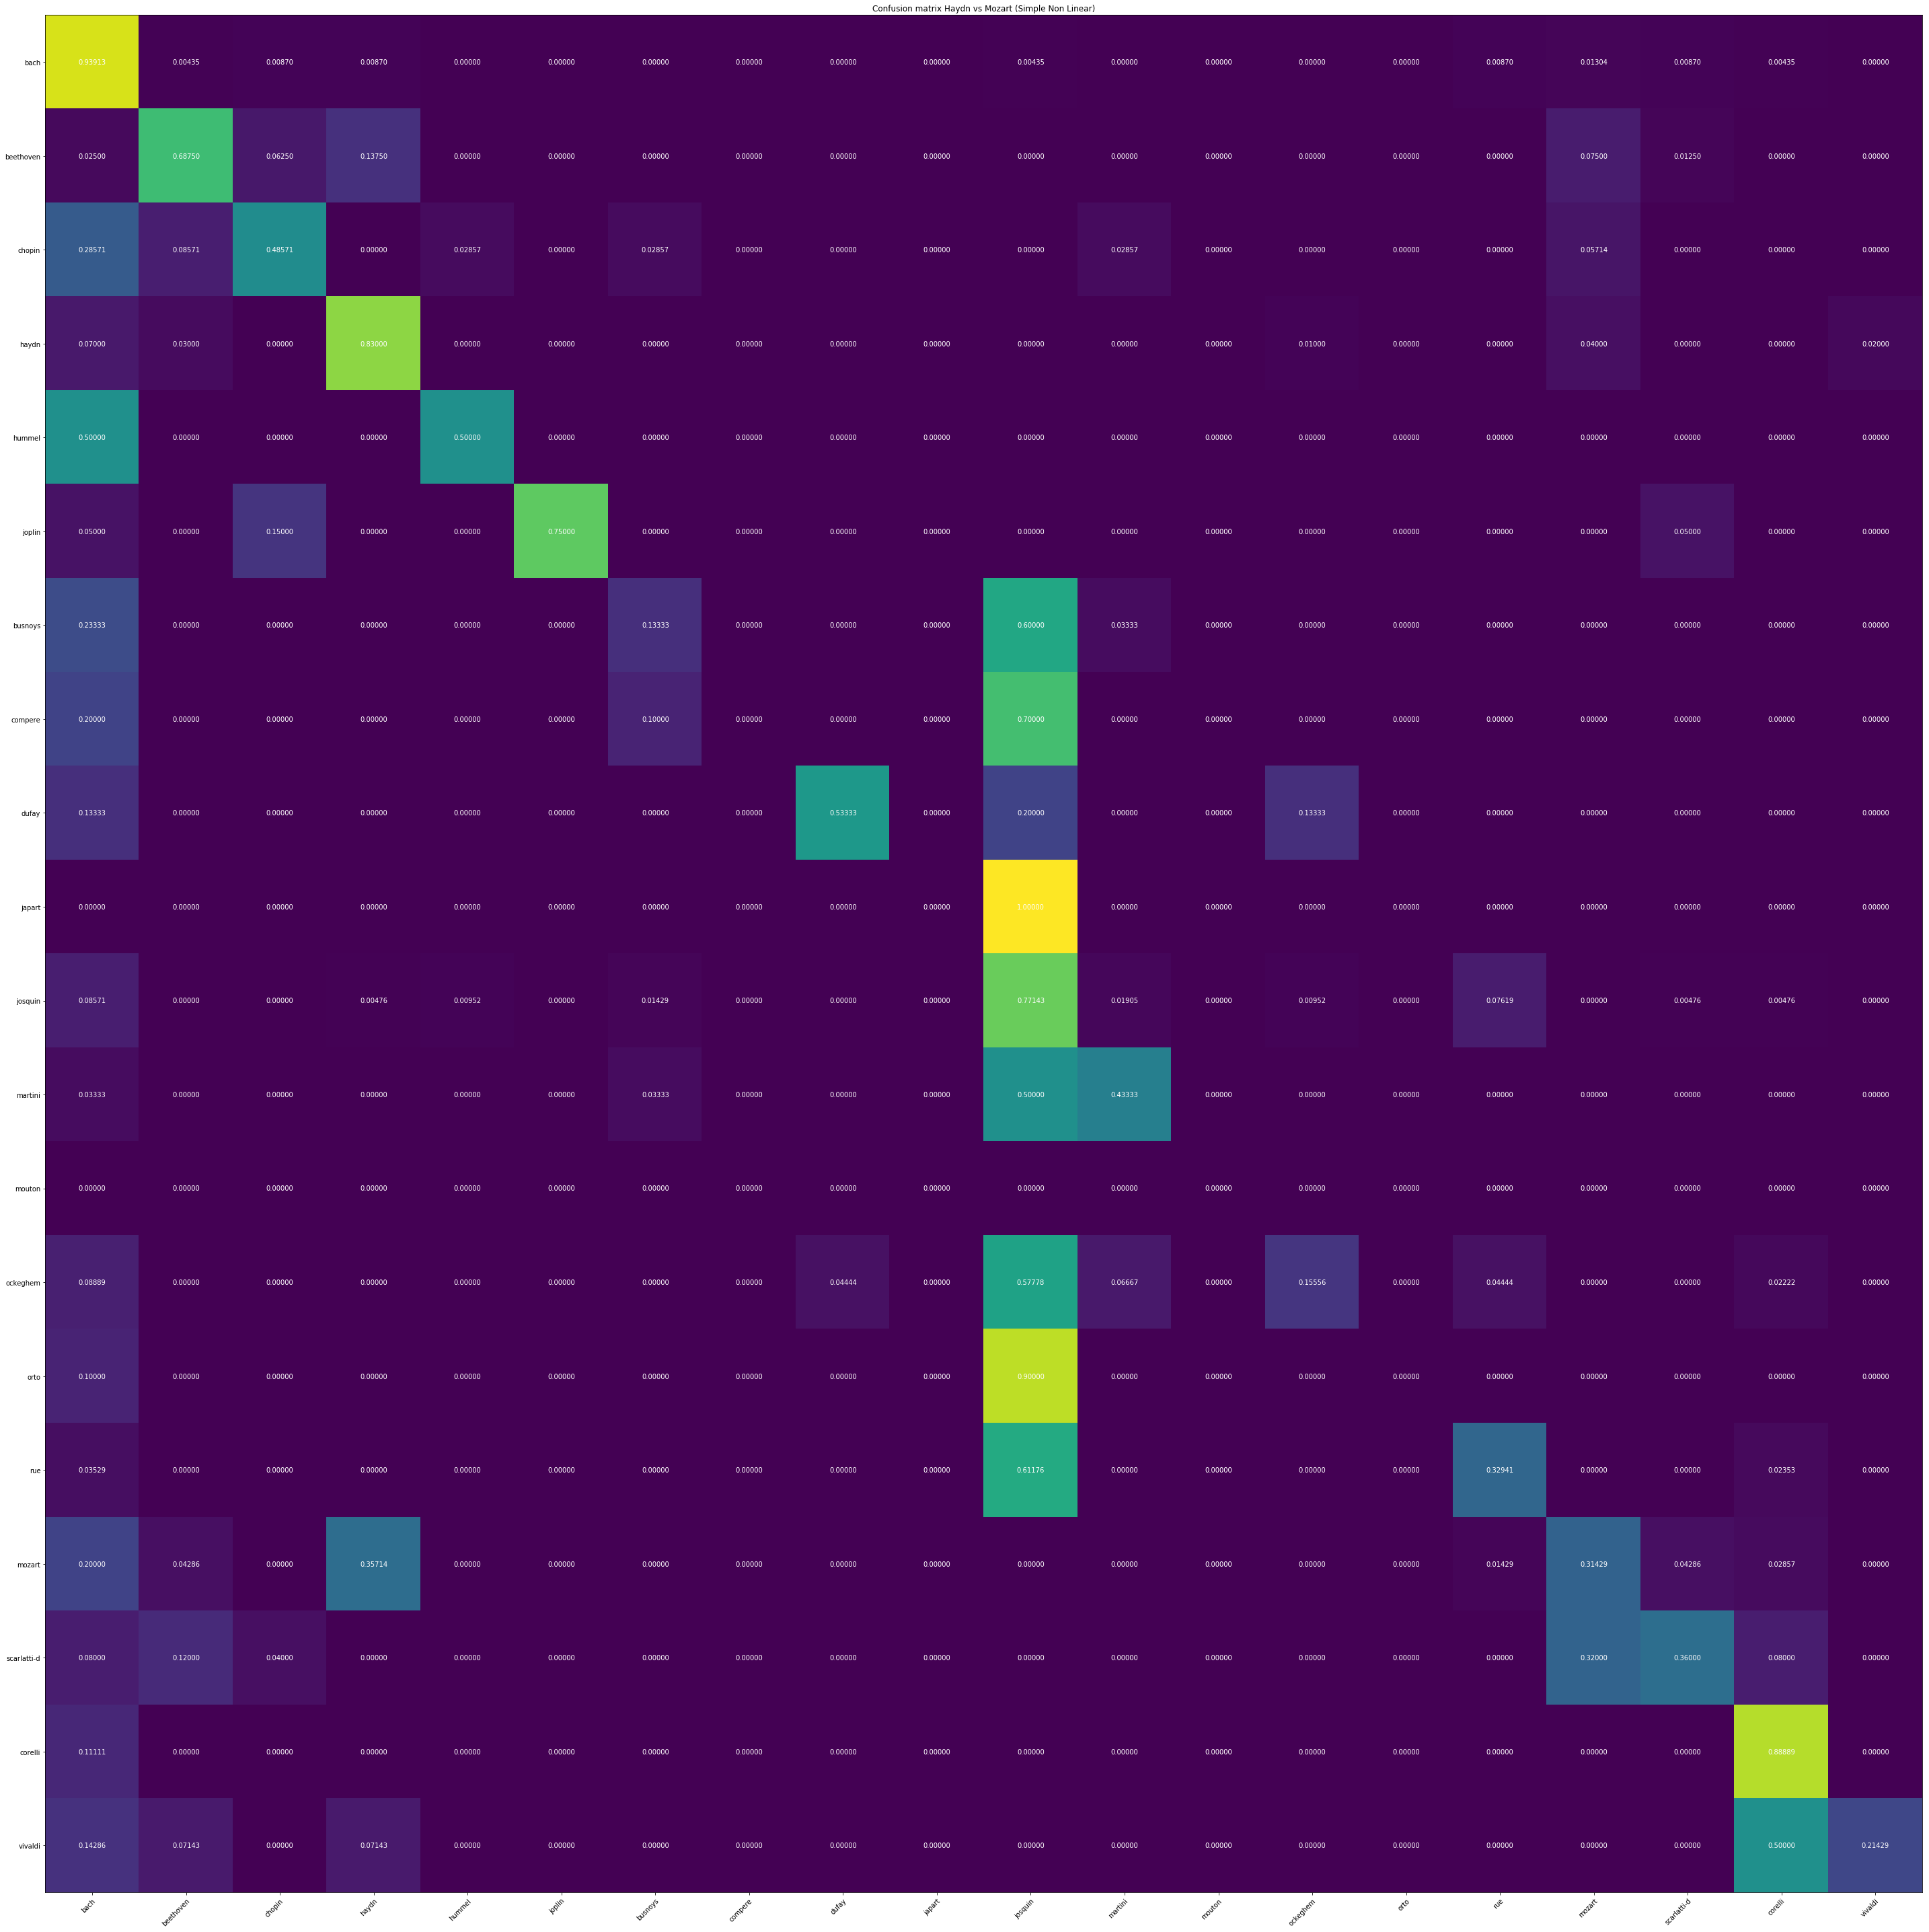

bach 41 / 46 = 0.8913043478260869
beethoven 10 / 16 = 0.625
busnoys 1 / 6 = 0.16666666666666666
chopin 2 / 7 = 0.2857142857142857
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 1 / 3 = 0.3333333333333333
haydn 14 / 20 = 0.7
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 2 / 4 = 0.5
josquin 35 / 42 = 0.8333333333333334
martini 6 / 12 = 0.5
mozart 9 / 14 = 0.6428571428571429
ockeghem 0 / 9 = 0.0
orto 0 / 4 = 0.0
rue 6 / 17 = 0.35294117647058826
scarlatti-d 3 / 5 = 0.6
vivaldi 1 / 2 = 0.5
147 231 0.6363636363636364
---------------------------------------------
---------------------------------------------
Fold 5
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31 iterations/epoc

61.50   62.93   3906    1.58    1.76    11.19   3.85    
61.50   63.36   3937    1.56    1.76    10.81   3.84    
62.00   64.22   3968    1.74    1.76    11.52   3.76    
62.00   63.79   3999    1.59    1.75    11.74   3.48    
62.00   64.22   4030    1.64    1.75    10.93   3.85    
61.50   63.79   4061    1.65    1.75    11.08   3.63    
62.00   65.09   4092    1.56    1.75    11.26   3.68    
62.00   63.79   4123    1.74    1.74    11.47   3.73    
62.00   63.79   4154    1.71    1.74    11.74   3.67    
61.50   64.66   4185    1.63    1.73    11.40   3.77    
62.00   63.79   4216    1.70    1.73    11.52   3.73    
61.50   63.79   4247    1.67    1.73    11.34   3.89    
62.00   64.22   4278    1.84    1.73    10.96   3.78    
61.50   65.52   4309    1.53    1.73    10.65   3.47    
62.00   63.79   4340    1.88    1.72    10.46   3.92    
62.00   63.79   4371    1.59    1.72    11.31   3.70    
62.00   64.66   4402    1.69    1.71    10.66   3.54    
62.00   64.66   4433    1.63   

67.00   67.24   8370    1.45    1.50    11.08   3.75    
68.00   67.24   8401    1.30    1.49    11.22   3.55    
68.50   67.24   8432    1.38    1.49    11.11   3.99    
68.50   67.67   8463    1.30    1.49    11.49   3.69    
67.50   67.24   8494    1.42    1.49    11.72   3.58    
68.00   67.67   8525    1.30    1.49    10.69   3.73    
68.00   67.67   8556    1.35    1.49    11.19   3.60    
69.00   67.24   8587    1.47    1.49    10.86   3.88    
69.00   67.24   8618    1.48    1.48    11.03   3.66    
68.50   67.24   8649    1.44    1.49    11.14   3.83    
69.00   67.67   8680    1.40    1.49    11.43   3.71    
68.50   67.24   8711    1.54    1.49    10.93   3.79    
68.50   67.24   8742    1.54    1.48    11.89   3.90    
69.00   67.24   8773    1.22    1.48    10.85   3.73    
68.00   67.67   8804    1.53    1.48    11.65   3.75    
68.00   67.24   8835    1.23    1.48    11.24   3.53    
69.50   68.10   8866    1.38    1.48    11.24   3.66    
68.50   67.67   8897    1.43   

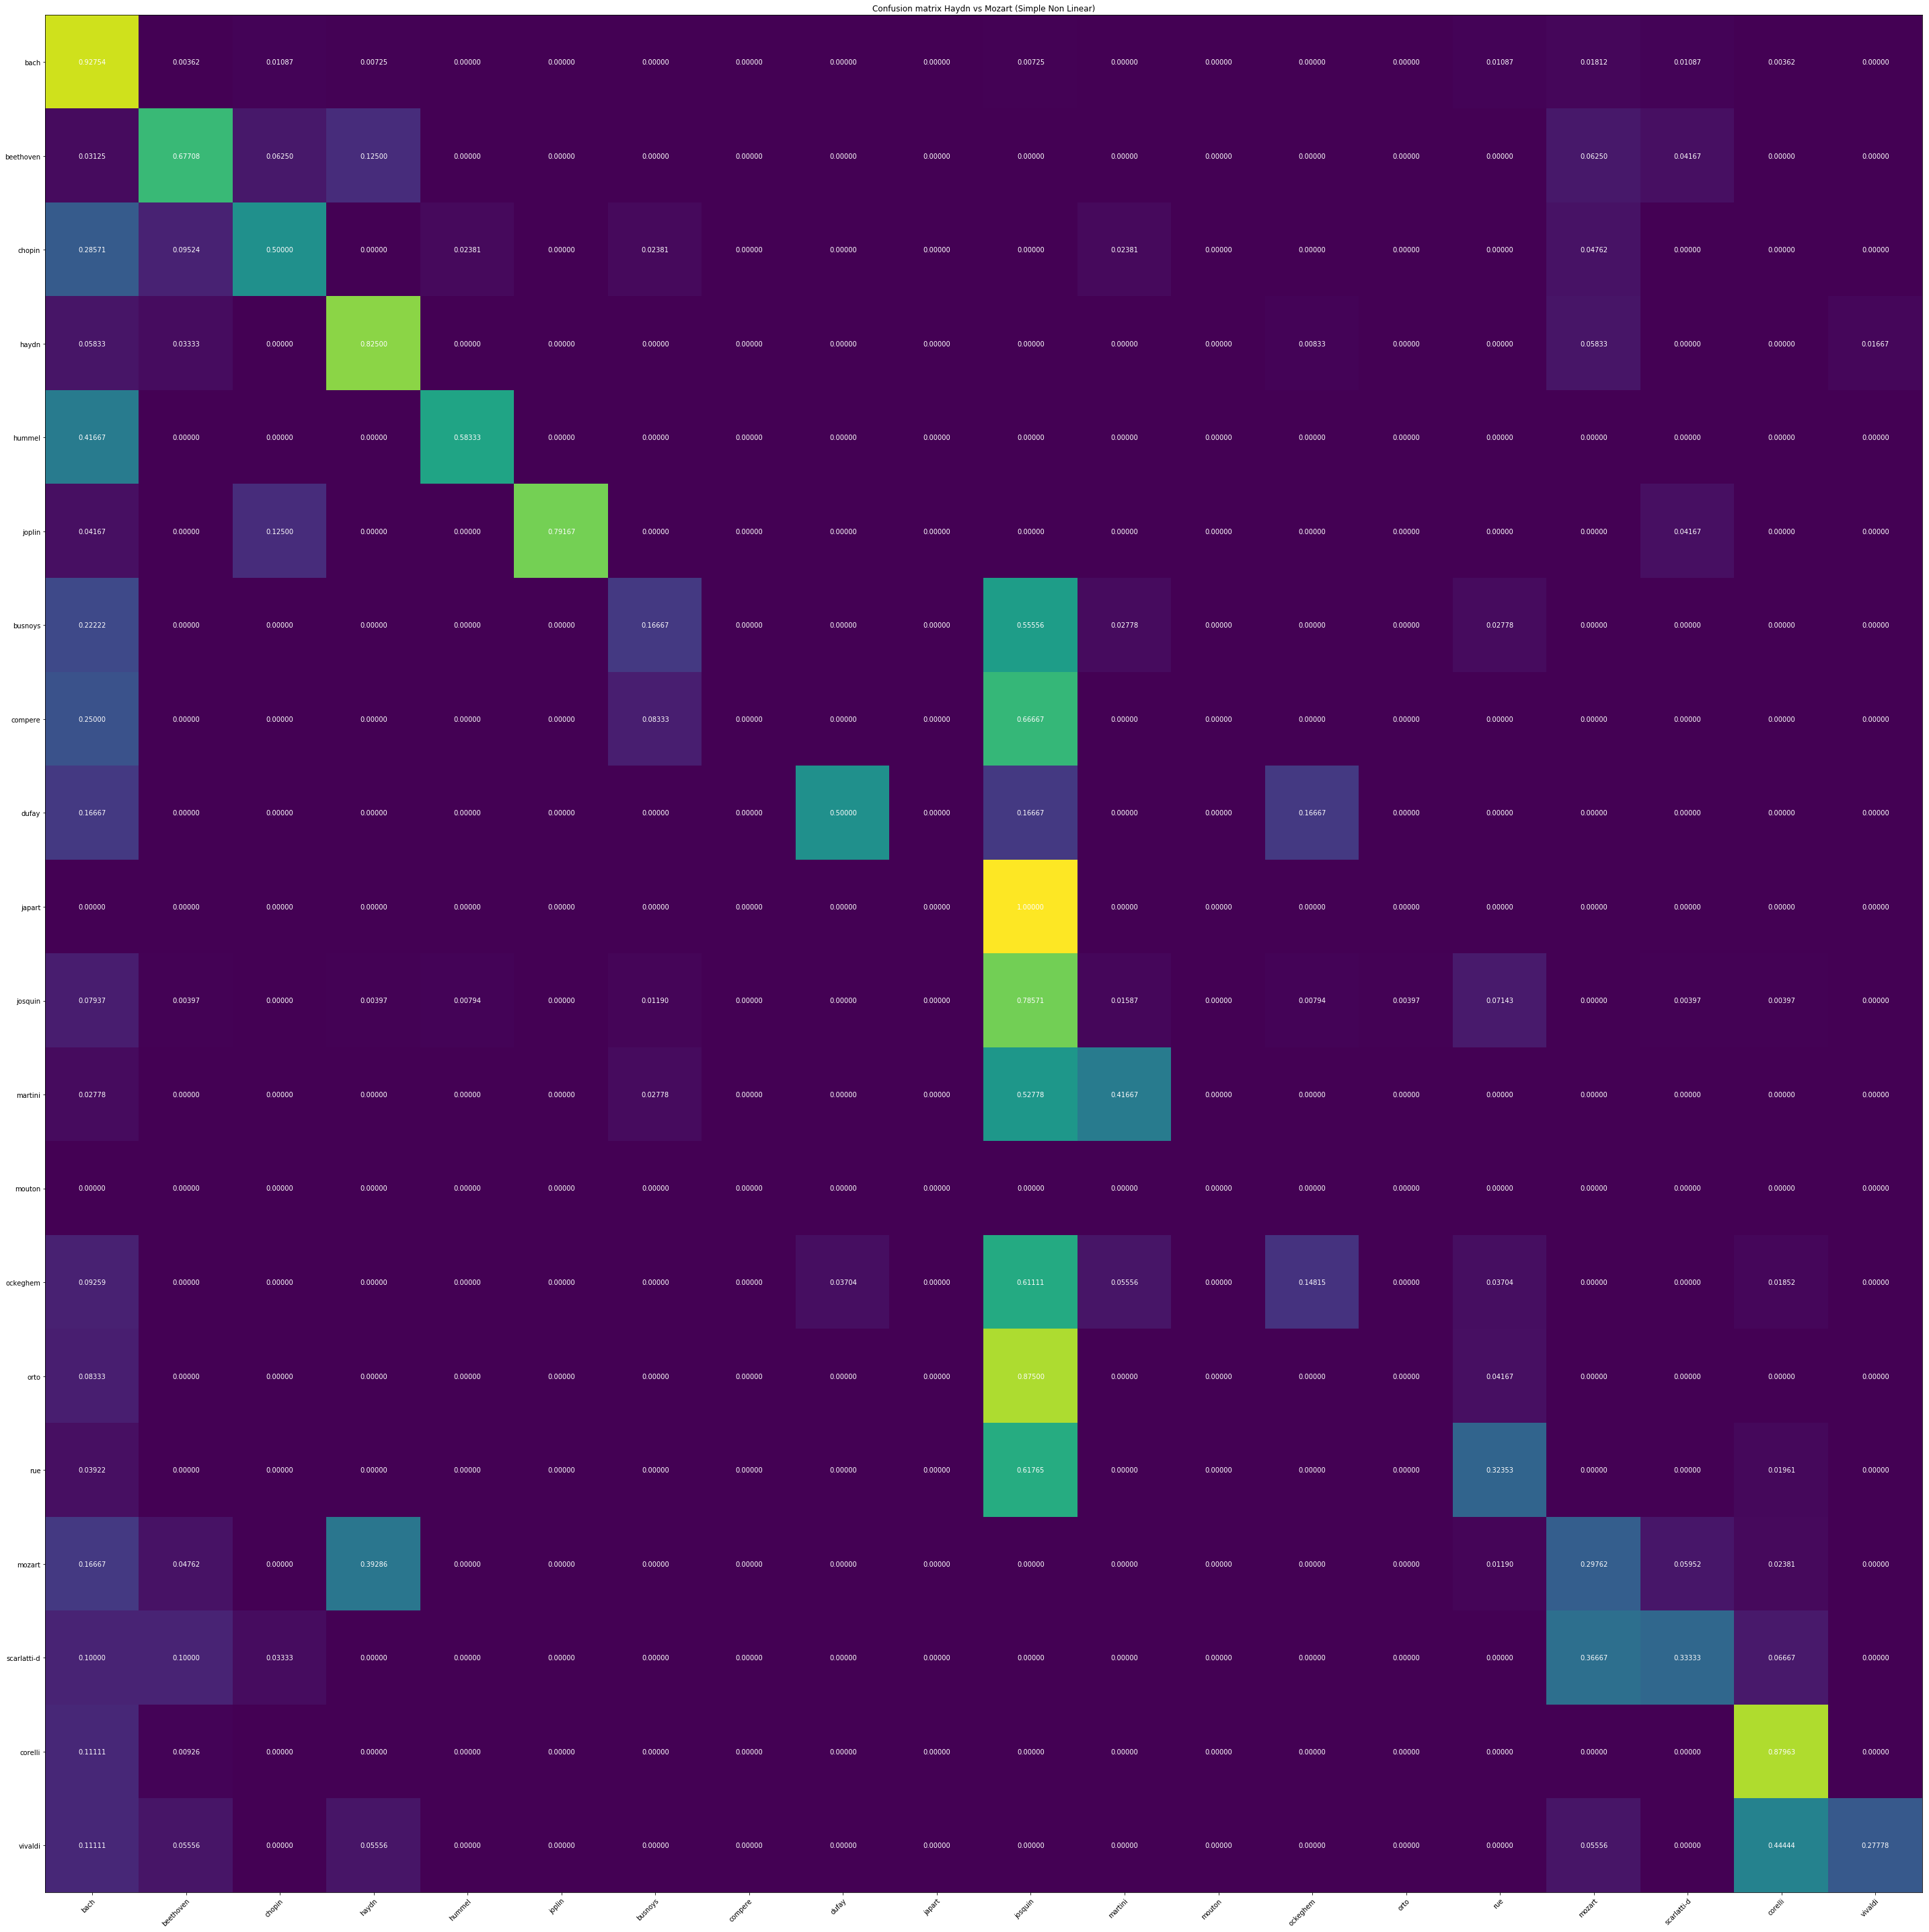

bach 40 / 46 = 0.8695652173913043
beethoven 10 / 16 = 0.625
busnoys 2 / 6 = 0.3333333333333333
chopin 4 / 7 = 0.5714285714285714
compere 0 / 2 = 0.0
corelli 15 / 18 = 0.8333333333333334
dufay 1 / 3 = 0.3333333333333333
haydn 16 / 20 = 0.8
hummel 2 / 2 = 1.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 36 / 42 = 0.8571428571428571
martini 4 / 12 = 0.3333333333333333
mozart 3 / 14 = 0.21428571428571427
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 5 / 17 = 0.29411764705882354
scarlatti-d 1 / 5 = 0.2
vivaldi 2 / 4 = 0.5
146 233 0.6266094420600858
---------------------------------------------
---------------------------------------------
Fold 6
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating

64.00   62.23   3875    1.48    1.87    9.55    3.50    
63.00   62.23   3906    1.66    1.87    10.22   3.64    
64.00   62.66   3937    1.56    1.87    9.58    3.55    
64.00   61.80   3968    1.56    1.86    9.53    3.58    
64.00   62.66   3999    1.67    1.86    9.53    3.41    
63.00   62.66   4030    1.74    1.86    9.76    3.43    
64.00   62.66   4061    1.61    1.86    10.68   3.48    
64.00   62.66   4092    1.62    1.85    10.37   3.50    
63.50   62.66   4123    1.55    1.85    10.38   3.55    
64.00   62.66   4154    1.72    1.85    10.95   3.25    
63.50   62.66   4185    1.46    1.85    10.30   3.32    
64.00   62.66   4216    1.59    1.84    9.92    3.30    
64.00   62.66   4247    1.52    1.84    10.46   3.33    
63.50   62.66   4278    1.52    1.84    9.57    3.24    
64.00   62.66   4309    1.43    1.83    10.42   3.29    
64.00   62.66   4340    1.67    1.83    10.72   3.47    
64.00   62.66   4371    1.47    1.83    10.09   3.34    
64.00   62.66   4402    1.36   

70.00   67.81   8339    1.26    1.62    10.25   3.57    
70.00   67.81   8370    1.27    1.62    10.31   3.37    
70.00   67.38   8401    1.55    1.62    10.01   3.48    
70.00   68.24   8432    1.28    1.61    10.44   3.42    
70.00   66.95   8463    1.24    1.62    9.27    3.50    
70.50   67.81   8494    1.36    1.62    10.18   3.59    
70.50   67.81   8525    1.32    1.61    9.58    3.32    
70.00   68.24   8556    1.28    1.61    10.68   3.58    
70.00   67.81   8587    1.35    1.61    9.98    3.16    
70.00   67.38   8618    1.29    1.61    10.59   3.26    
70.50   66.95   8649    1.32    1.61    10.40   3.48    
70.50   68.24   8680    1.46    1.61    9.88    3.38    
70.50   67.81   8711    1.42    1.61    10.07   3.46    
71.00   67.81   8742    1.18    1.61    9.91    3.39    
70.00   68.24   8773    1.32    1.60    10.44   3.52    
71.00   68.24   8804    1.35    1.60    10.43   3.73    
71.00   68.24   8835    1.38    1.60    10.61   3.53    
71.00   67.38   8866    1.28   

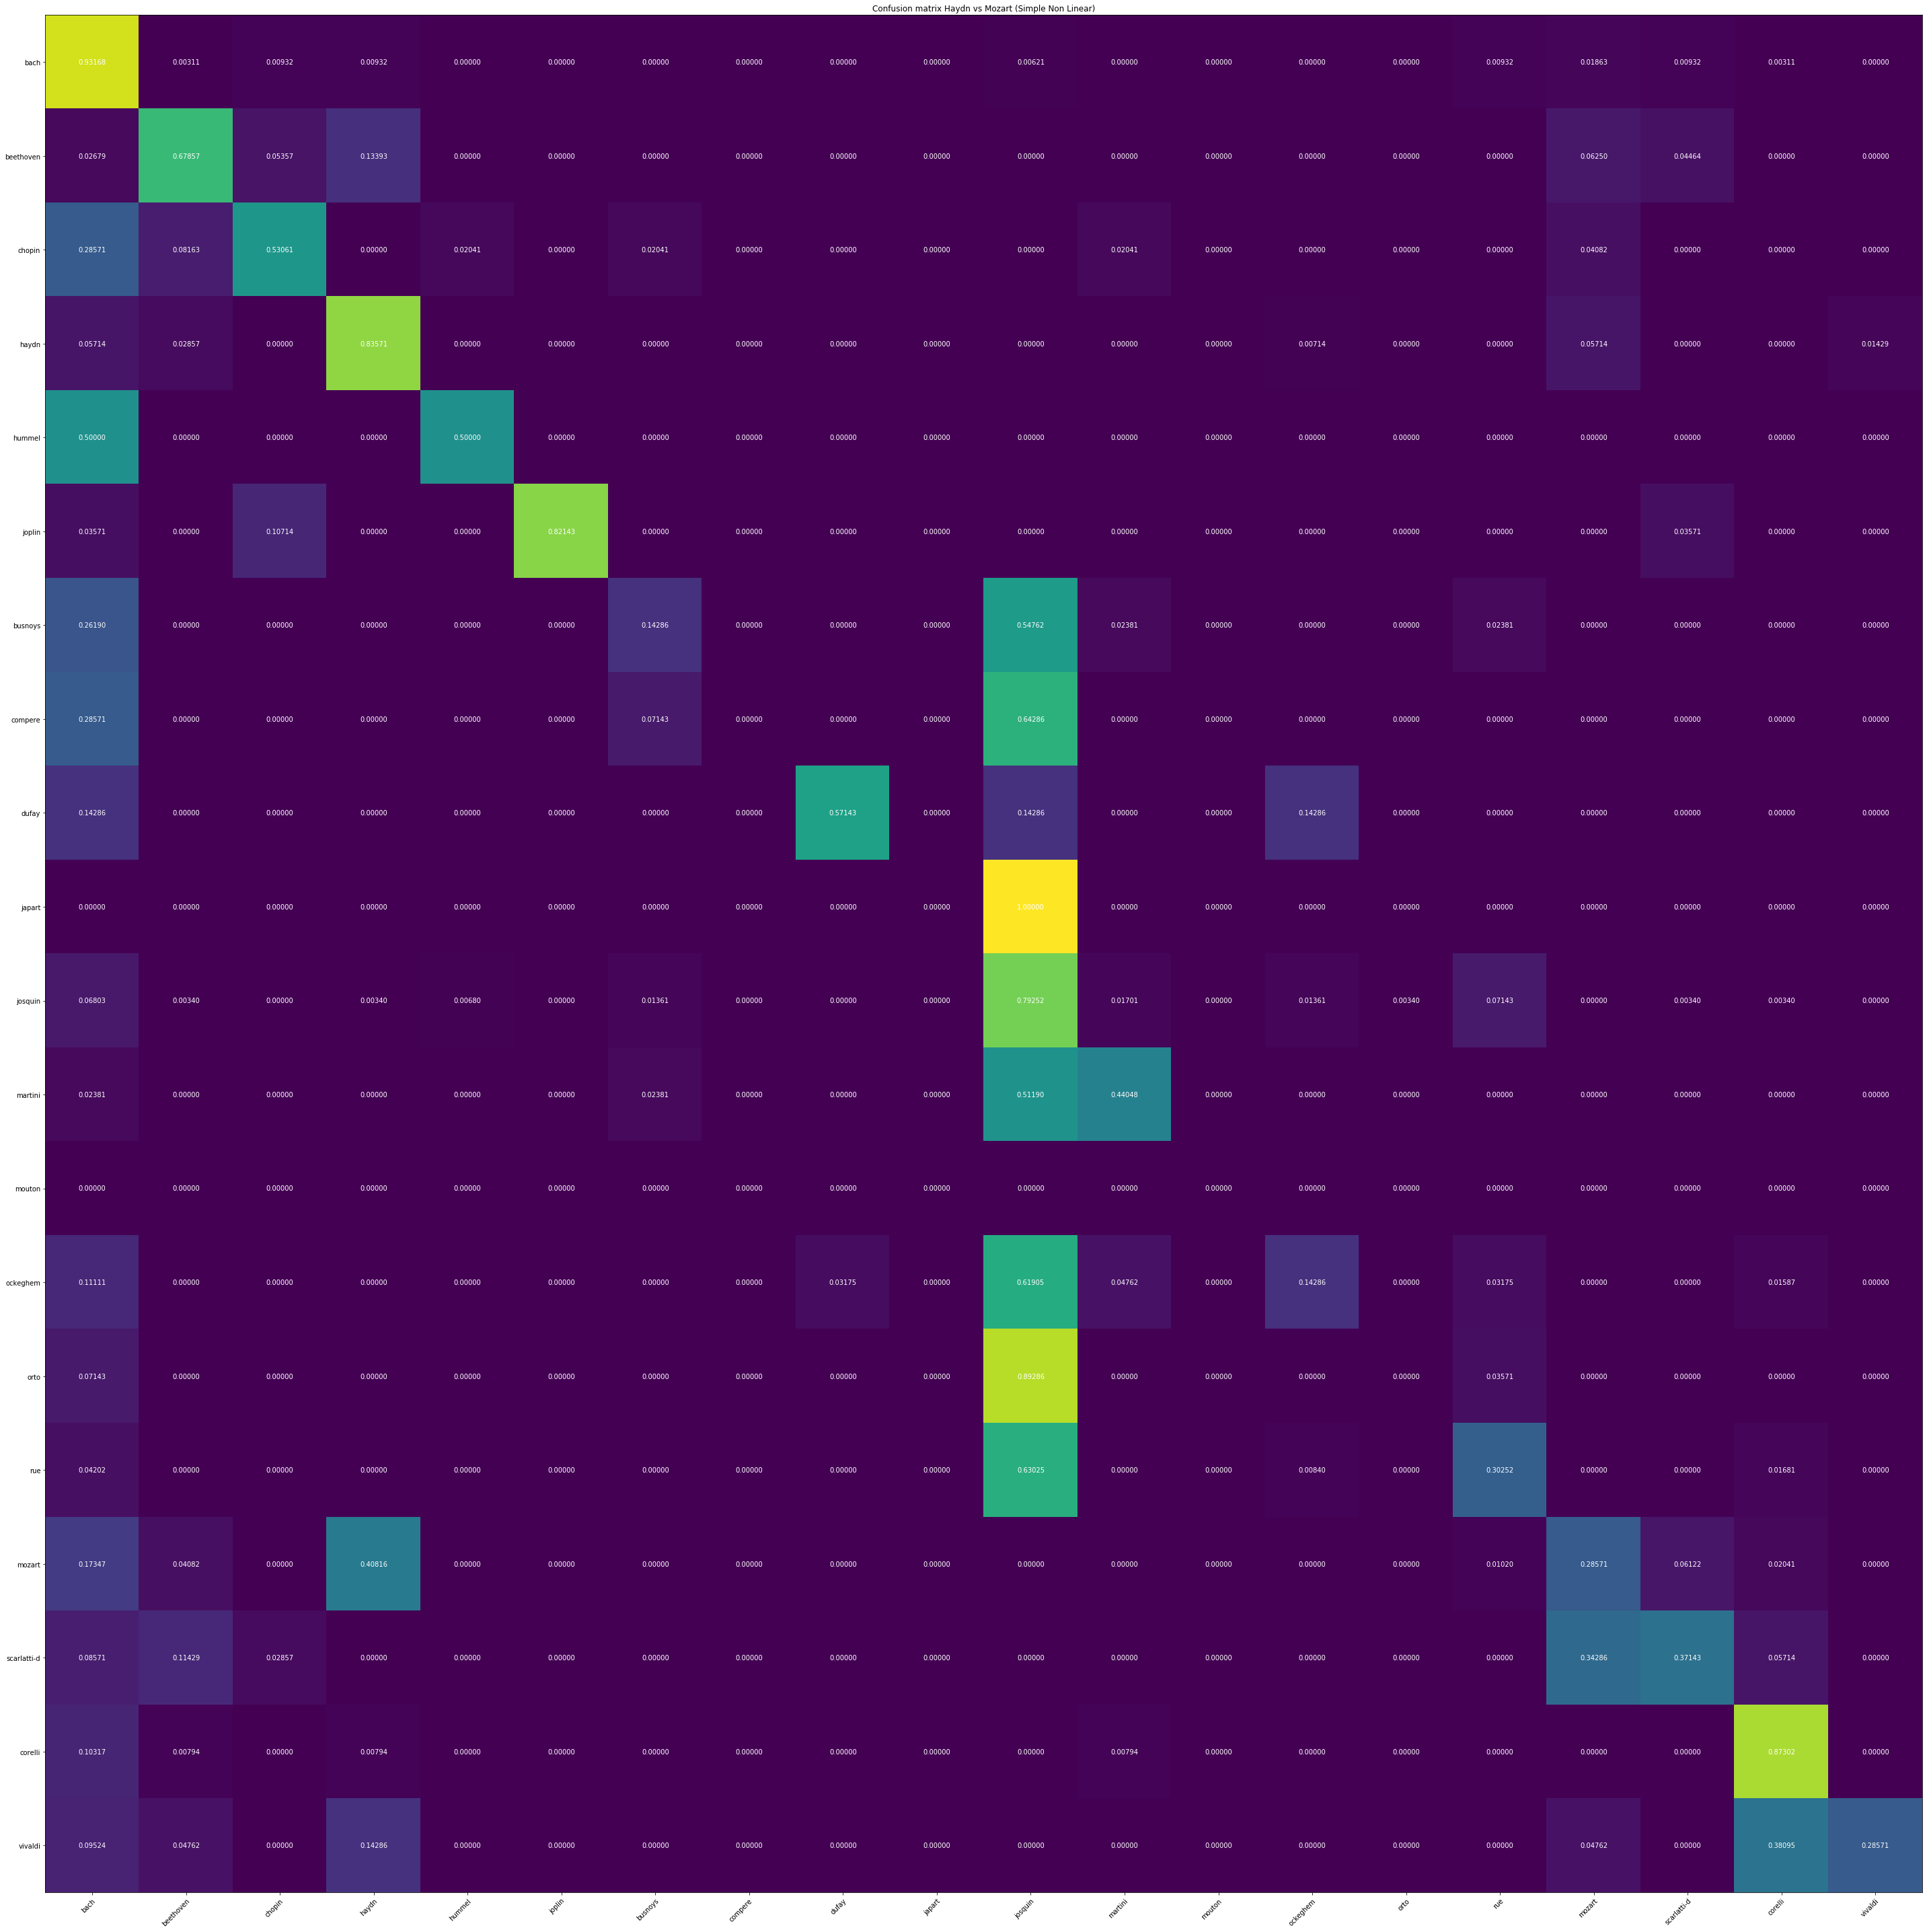

bach 44 / 46 = 0.9565217391304348
beethoven 11 / 16 = 0.6875
busnoys 0 / 6 = 0.0
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 15 / 18 = 0.8333333333333334
dufay 3 / 3 = 1.0
haydn 18 / 20 = 0.9
hummel 0 / 2 = 0.0
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 35 / 42 = 0.8333333333333334
martini 7 / 12 = 0.5833333333333334
mozart 3 / 14 = 0.21428571428571427
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 3 / 17 = 0.17647058823529413
scarlatti-d 3 / 5 = 0.6
vivaldi 1 / 3 = 0.3333333333333333
153 232 0.6594827586206896
---------------------------------------------
---------------------------------------------
Fold 7
len validation_ids 246
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 31

62.00   62.93   3906    1.65    1.82    10.53   3.65    
62.00   63.36   3937    1.67    1.82    9.38    3.52    
63.00   63.36   3968    1.71    1.81    9.09    3.22    
64.00   63.36   3999    1.57    1.81    10.40   3.53    
62.50   63.36   4030    1.78    1.80    10.40   3.43    
63.00   63.36   4061    1.57    1.80    10.05   3.36    
62.50   63.36   4092    1.57    1.80    9.98    3.32    
64.50   62.93   4123    1.48    1.79    10.67   3.54    
63.00   62.93   4154    1.75    1.79    10.29   3.42    
62.50   63.36   4185    1.54    1.79    10.38   3.33    
64.00   63.36   4216    1.73    1.79    9.77    3.22    
64.50   63.36   4247    1.68    1.78    9.88    3.52    
65.00   63.36   4278    1.67    1.78    9.76    3.23    
64.00   63.36   4309    1.78    1.78    10.07   3.34    
65.50   63.36   4340    1.55    1.78    10.33   3.69    
64.50   63.79   4371    1.52    1.77    8.96    3.22    
65.50   63.79   4402    1.66    1.77    9.36    3.20    
65.50   63.79   4433    1.60   

69.00   66.81   8370    1.32    1.55    10.85   3.55    
68.50   66.81   8401    1.20    1.55    10.20   3.28    
69.00   67.24   8432    1.21    1.55    10.74   3.44    
69.00   66.38   8463    1.28    1.55    9.19    3.52    
69.00   66.38   8494    1.28    1.55    10.67   3.65    
68.50   65.95   8525    1.33    1.55    10.16   3.43    
68.50   66.81   8556    1.36    1.55    9.98    3.26    
68.50   66.38   8587    1.31    1.54    9.50    3.33    
69.00   67.24   8618    1.43    1.54    9.96    3.55    
68.50   67.24   8649    1.36    1.54    9.67    3.41    
69.00   66.81   8680    1.45    1.54    10.42   3.19    
68.50   67.24   8711    1.30    1.54    10.08   3.31    
69.00   66.38   8742    1.34    1.54    10.02   3.39    
69.00   66.38   8773    1.29    1.54    10.27   3.46    
69.00   66.81   8804    1.34    1.54    10.08   3.45    
69.00   67.24   8835    1.21    1.54    10.88   3.26    
68.50   65.95   8866    1.30    1.54    10.17   3.41    
69.50   66.81   8897    1.15   

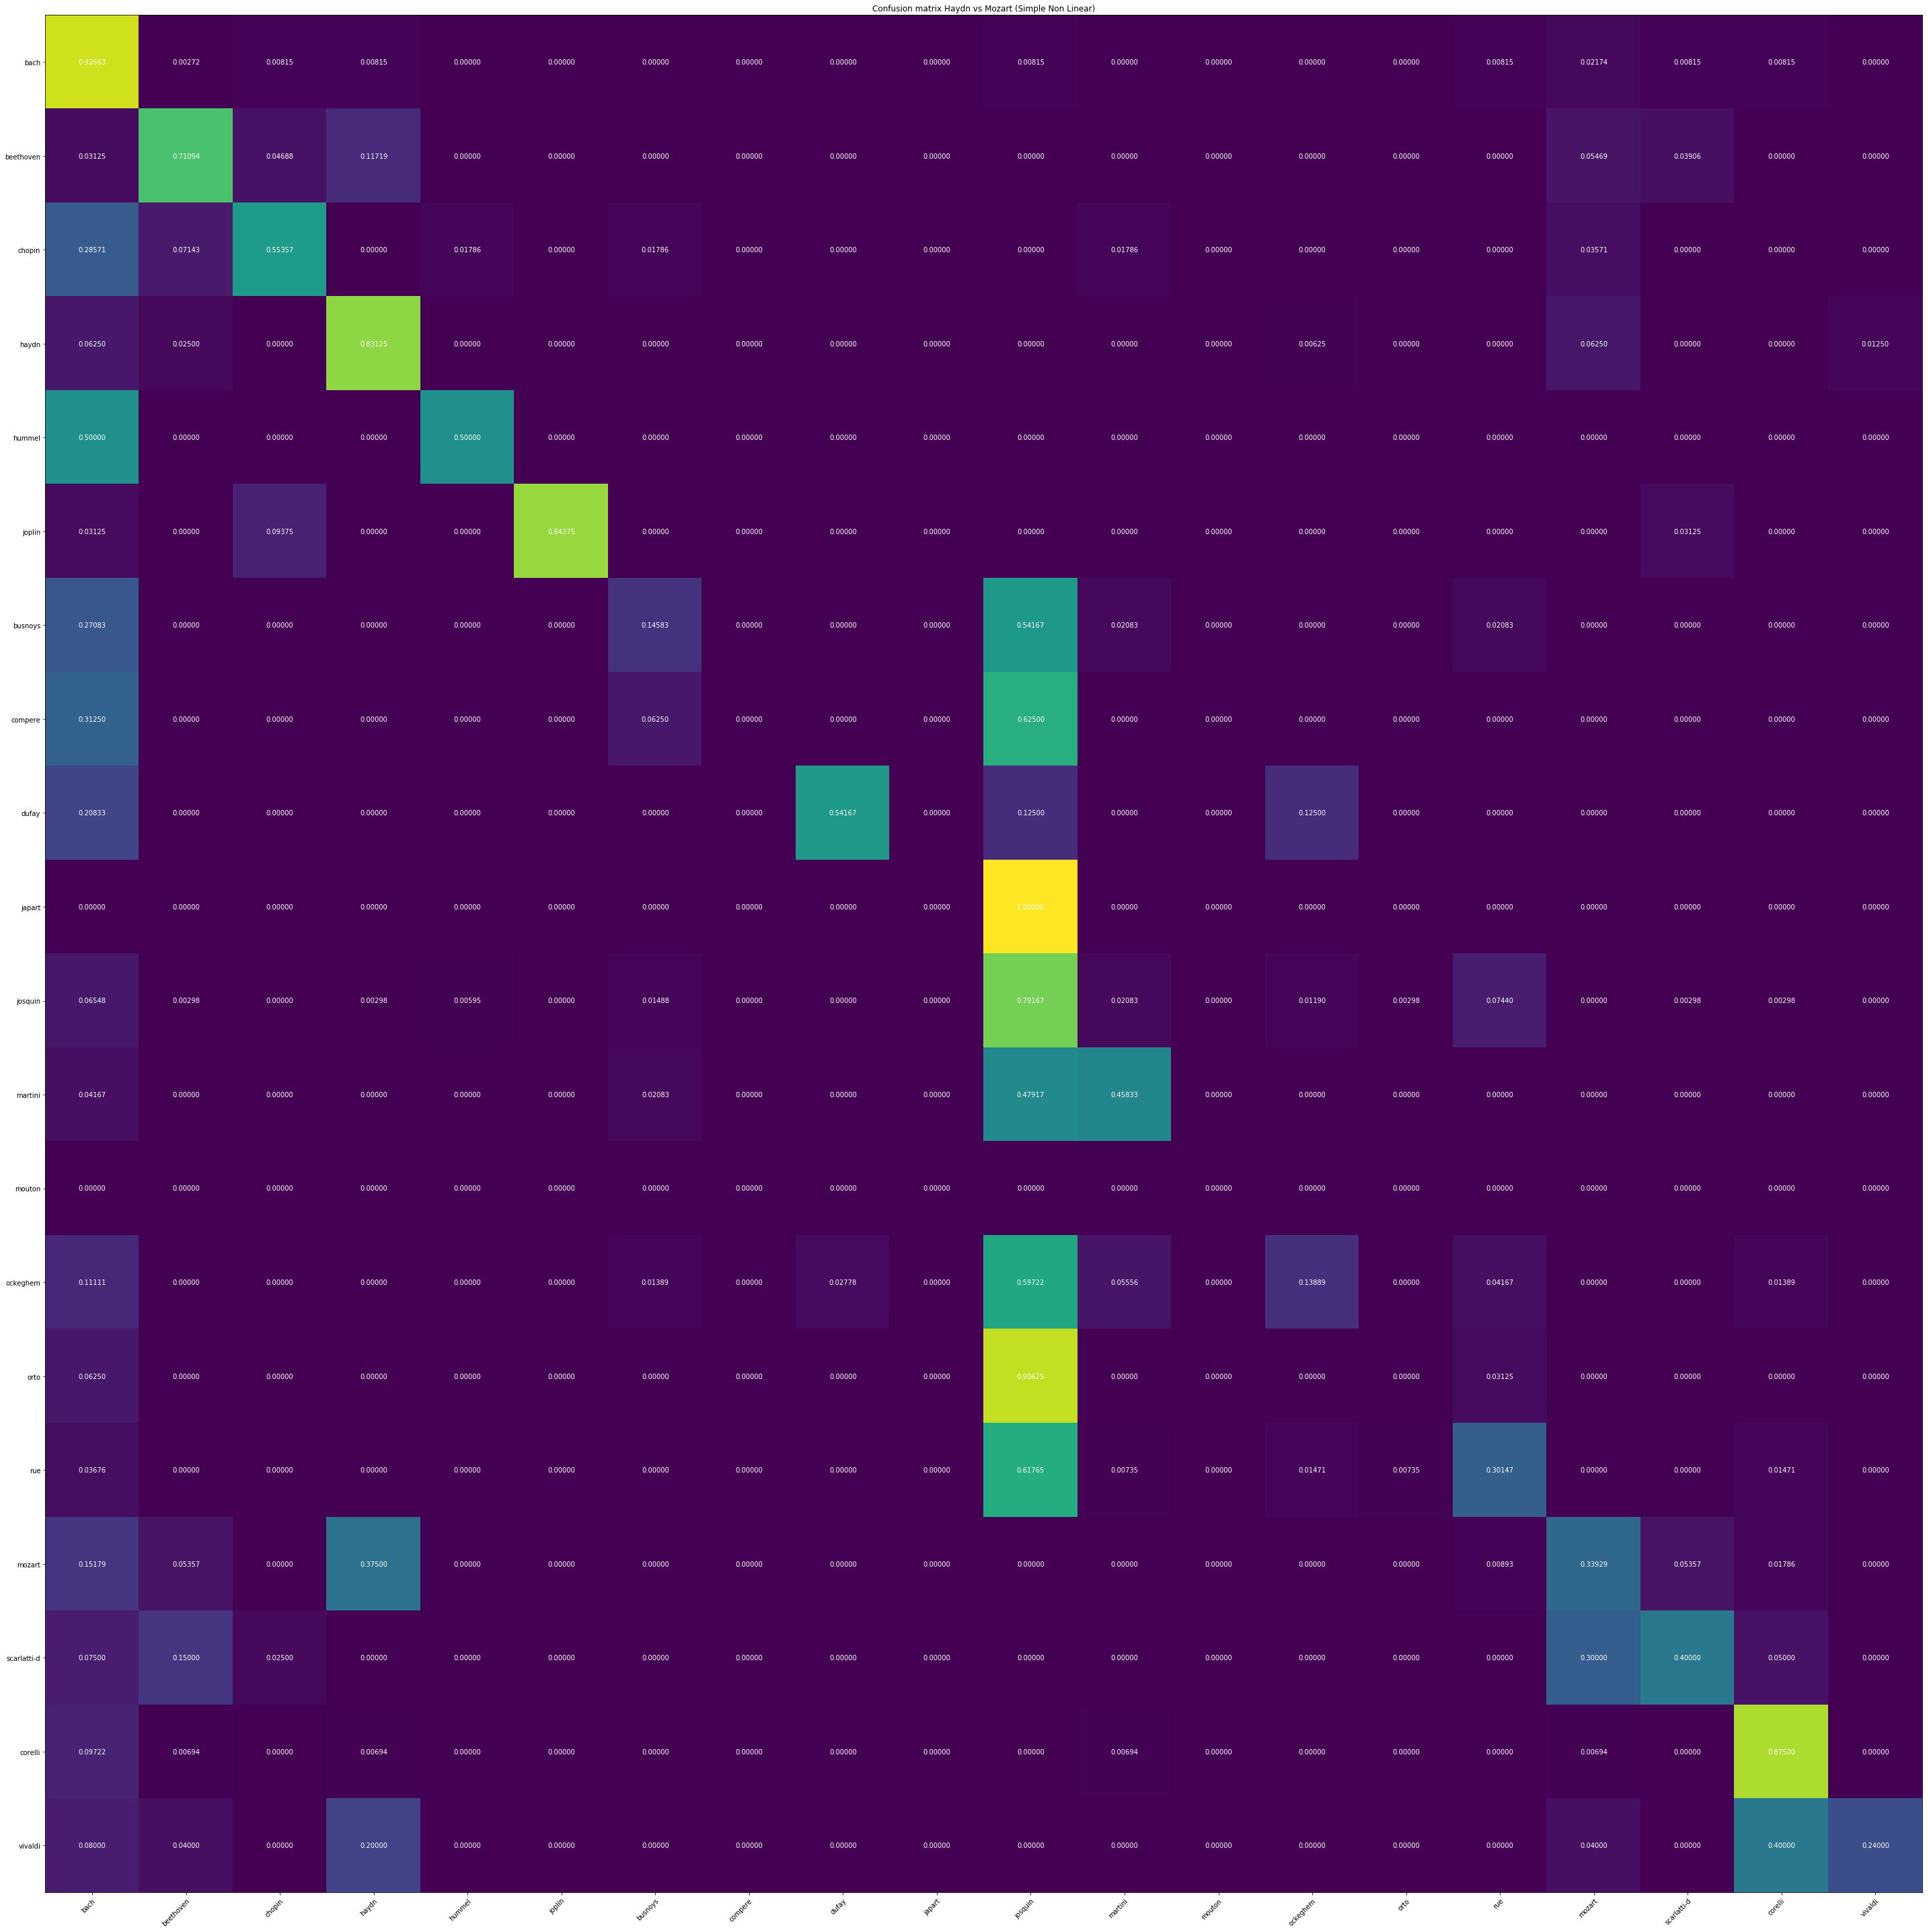

bach 41 / 46 = 0.8913043478260869
beethoven 15 / 16 = 0.9375
busnoys 1 / 6 = 0.16666666666666666
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 16 / 18 = 0.8888888888888888
dufay 1 / 3 = 0.3333333333333333
haydn 16 / 20 = 0.8
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 33 / 42 = 0.7857142857142857
martini 7 / 12 = 0.5833333333333334
mozart 10 / 14 = 0.7142857142857143
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 5 / 17 = 0.29411764705882354
scarlatti-d 3 / 5 = 0.6
vivaldi 0 / 4 = 0.0
159 233 0.6824034334763949
---------------------------------------------
---------------------------------------------
Fold 8
len validation_ids 400
len test_ids 246
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiati

56.00   51.58   3750    1.90    2.13    9.74    3.63    
56.00   50.43   3780    2.00    2.11    10.64   3.75    
55.50   50.43   3810    1.79    2.11    9.88    3.83    
54.50   50.43   3840    1.86    2.11    10.17   4.15    
55.00   51.00   3870    1.97    2.10    10.50   4.17    
55.00   51.00   3900    1.92    2.09    10.65   3.74    
54.50   51.29   3930    2.07    2.09    9.82    3.58    
55.00   51.00   3960    1.93    2.08    10.17   3.80    
55.50   50.43   3990    1.77    2.09    10.22   3.89    
55.00   50.43   4020    1.92    2.09    10.57   3.76    
54.00   51.00   4050    1.83    2.09    10.34   3.75    
55.00   51.86   4080    1.90    2.09    10.40   3.84    
56.00   51.86   4110    1.75    2.08    9.99    3.96    
55.00   51.58   4140    1.78    2.09    9.82    3.80    
55.00   53.58   4170    1.94    2.07    10.49   3.81    
56.00   52.72   4200    2.00    2.07    9.96    3.85    
55.00   51.86   4230    1.82    2.07    10.47   4.02    
55.50   52.15   4260    1.90   

65.50   59.60   8070    1.47    1.81    10.87   3.92    
66.00   59.60   8100    1.75    1.80    10.41   3.94    
65.00   59.31   8130    1.61    1.81    10.72   3.80    
65.00   59.31   8160    1.69    1.81    9.92    3.60    
65.50   59.89   8190    1.52    1.80    9.78    3.92    
65.00   59.31   8220    1.70    1.81    11.05   3.83    
65.00   60.46   8250    1.53    1.79    10.30   3.90    
64.00   60.17   8280    1.47    1.79    10.47   3.83    
64.00   59.60   8310    1.66    1.80    9.94    3.97    
63.50   59.89   8340    1.81    1.79    10.75   4.22    
64.50   59.60   8370    1.54    1.79    11.71   4.09    
65.50   59.31   8400    1.47    1.79    10.46   4.04    
65.00   58.74   8430    1.66    1.79    10.45   3.70    
64.50   58.74   8460    1.63    1.79    9.75    3.97    
65.00   58.74   8490    1.55    1.79    10.04   3.77    
65.00   58.17   8520    1.63    1.79    9.81    3.93    
65.00   59.31   8550    1.62    1.79    9.80    3.96    
65.00   59.89   8580    1.51   

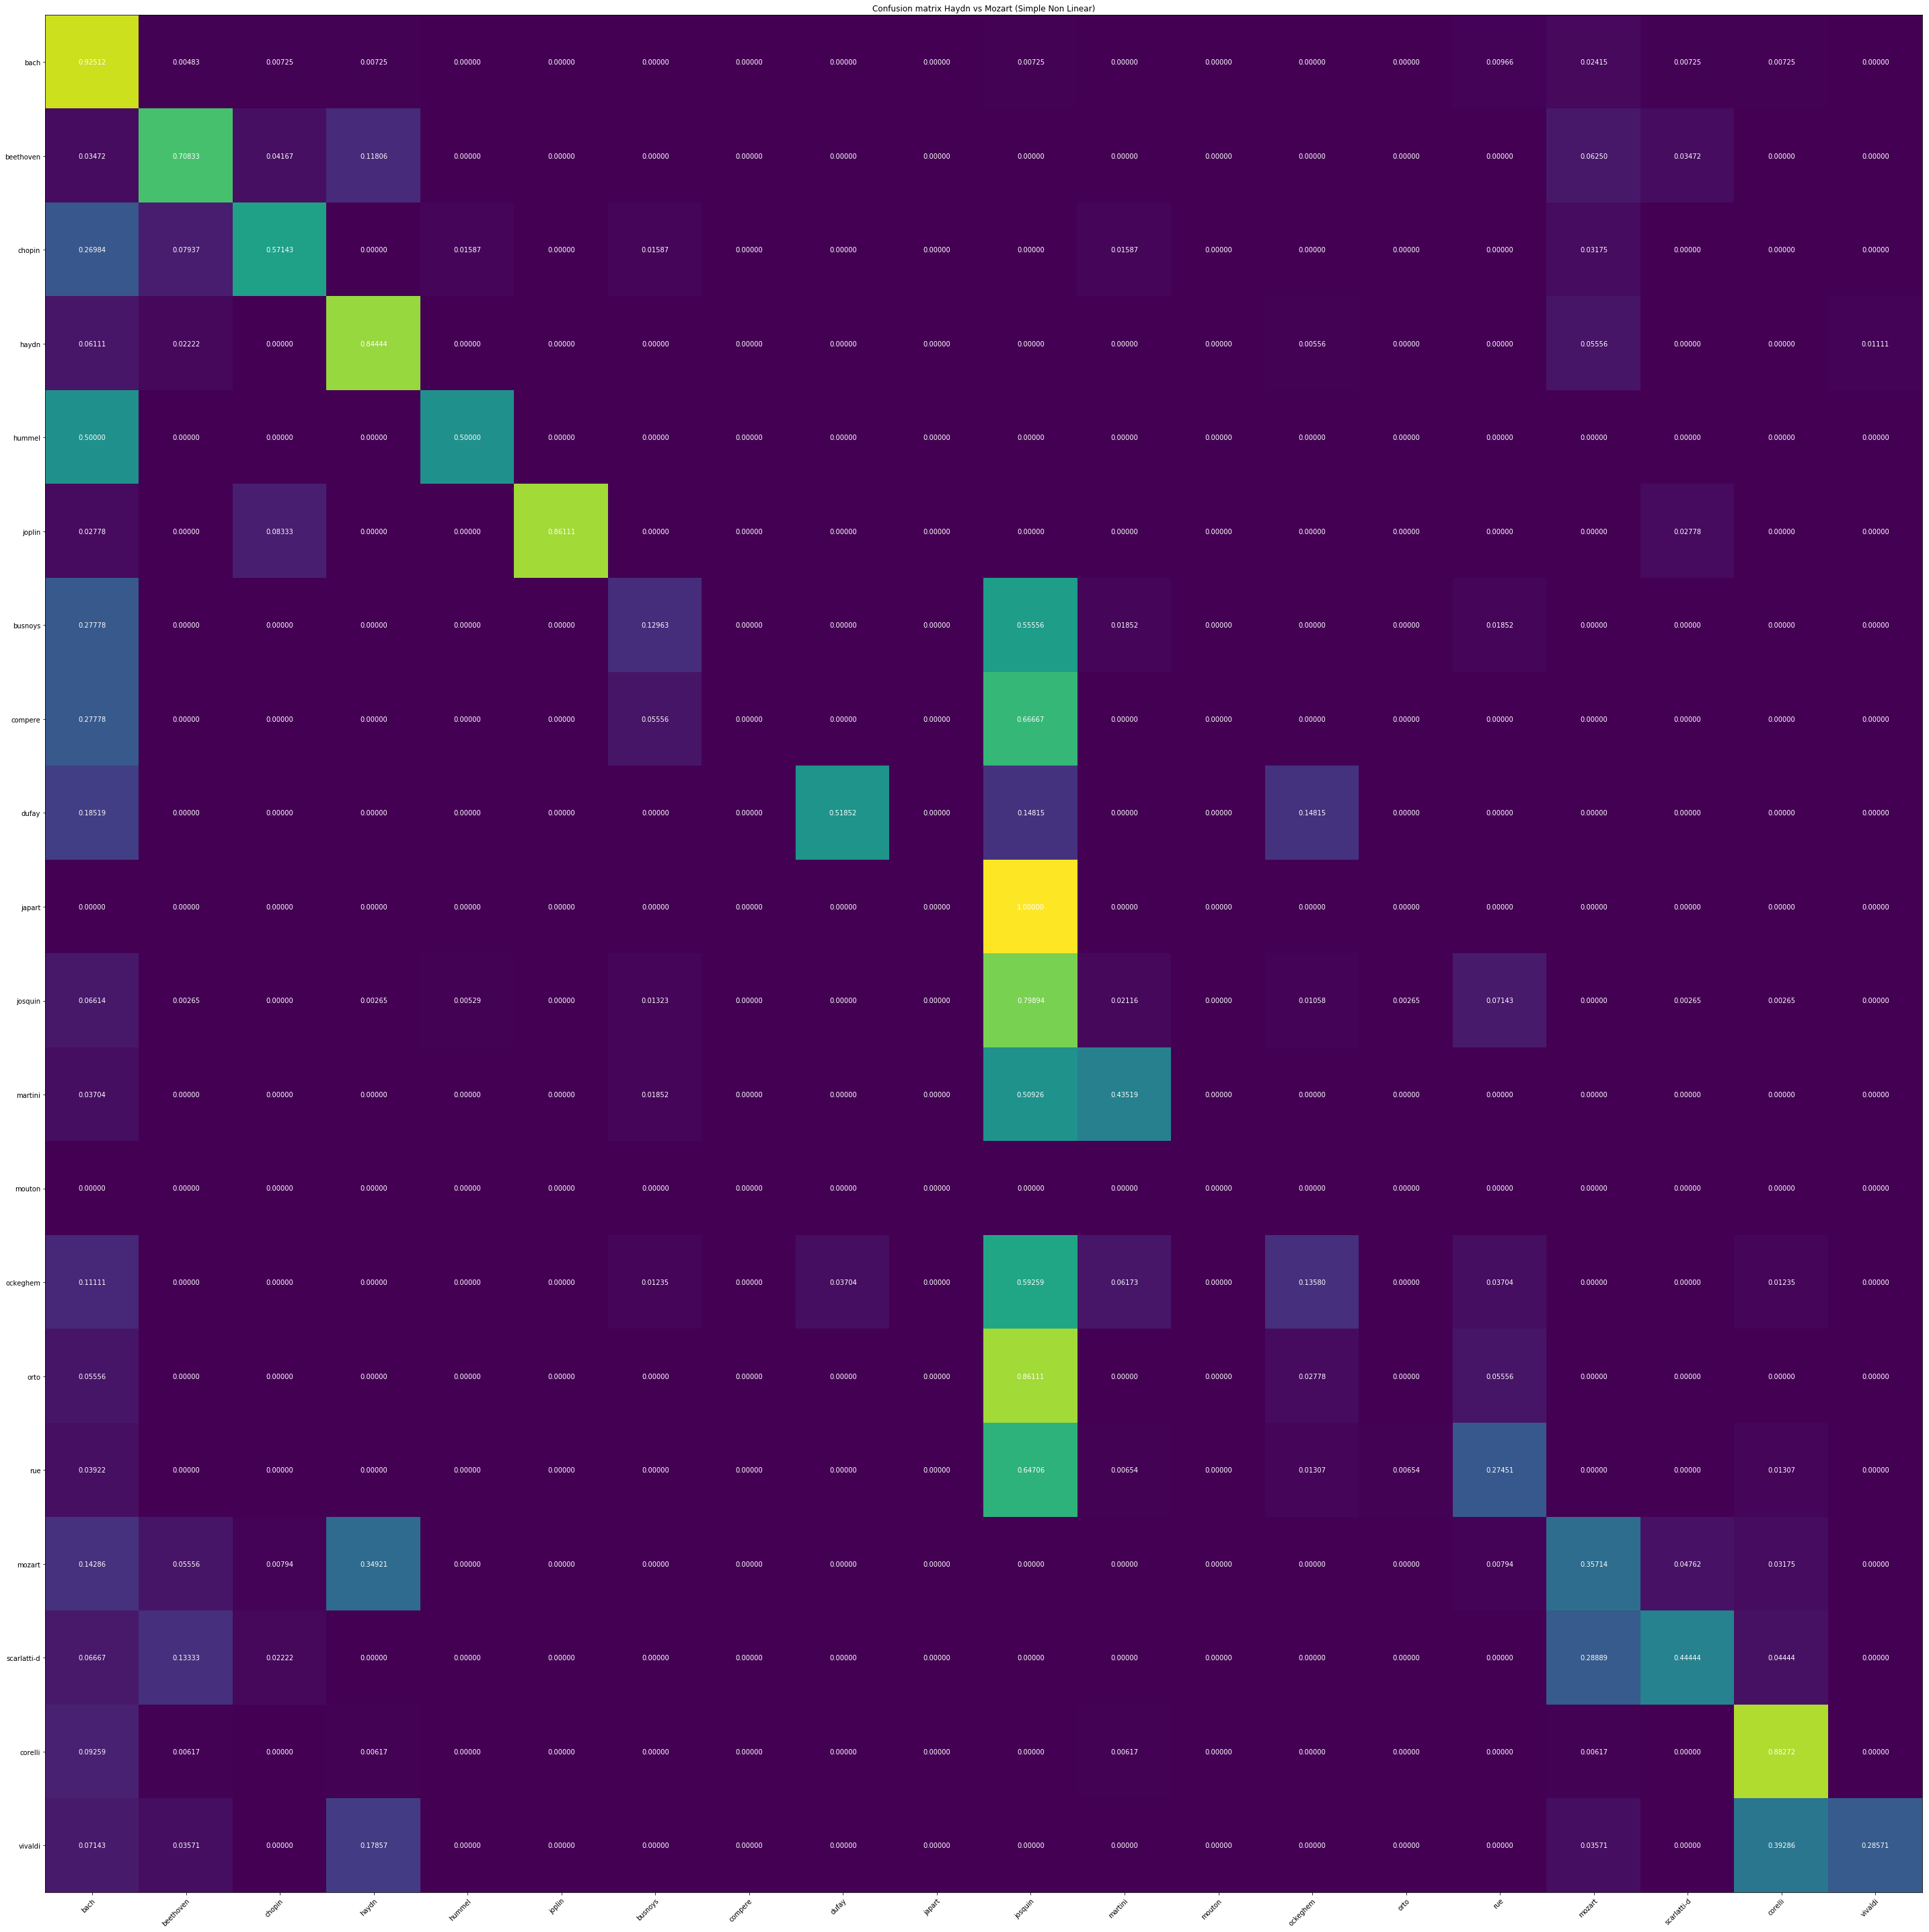

bach 42 / 46 = 0.9130434782608695
beethoven 11 / 16 = 0.6875
busnoys 0 / 6 = 0.0
chopin 5 / 7 = 0.7142857142857143
compere 0 / 2 = 0.0
corelli 17 / 18 = 0.9444444444444444
dufay 1 / 3 = 0.3333333333333333
haydn 19 / 20 = 0.95
hummel 1 / 2 = 0.5
japart 0 / 2 = 0.0
joplin 4 / 4 = 1.0
josquin 36 / 42 = 0.8571428571428571
martini 3 / 12 = 0.25
mozart 7 / 14 = 0.5
ockeghem 1 / 9 = 0.1111111111111111
orto 0 / 4 = 0.0
rue 1 / 17 = 0.058823529411764705
scarlatti-d 4 / 5 = 0.8
vivaldi 2 / 3 = 0.6666666666666666
154 232 0.6637931034482759
---------------------------------------------
---------------------------------------------
Fold 9
len validation_ids 246
len test_ids 400
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
Found cached voices datafile at data/voices_data.npz
w_e torch.Size([78, 20]) (1560)
w_t torch.Size([55, 20]) (1100)
bias torch.Size([20]) (20)
Initialized graph with 2680 parameters
Initiating optimizer, 30 iterations/e

57.50   54.35   3780    1.90    2.02    9.74    3.43    
57.50   54.78   3810    1.72    2.01    10.68   3.62    
56.50   54.78   3840    1.82    2.01    10.21   3.52    
57.00   54.78   3870    1.73    2.01    10.33   3.40    
56.00   54.35   3900    1.88    2.00    10.16   3.39    
57.00   54.78   3930    1.79    2.00    9.65    3.48    
56.50   55.22   3960    1.88    2.00    9.03    3.48    
56.00   54.78   3990    1.65    2.00    9.94    3.47    
56.00   55.65   4020    1.80    1.99    9.64    3.32    
55.50   54.35   4050    2.03    1.98    9.59    3.34    
57.50   55.65   4080    1.99    1.98    10.54   3.44    
57.00   54.78   4110    1.69    1.98    9.11    3.20    
57.00   54.78   4140    1.91    1.97    9.45    3.65    
56.00   55.65   4170    1.82    1.97    10.43   3.53    
56.00   55.65   4200    1.91    1.97    9.99    3.42    
56.50   55.65   4230    1.80    1.97    9.37    3.21    
57.50   55.65   4260    1.73    1.97    9.32    3.57    
58.00   55.22   4290    1.78   

61.50   61.30   8100    1.48    1.76    9.58    3.23    
62.50   62.61   8130    1.58    1.76    9.94    3.51    
64.00   63.04   8160    1.54    1.75    9.16    3.33    
62.50   61.74   8190    1.46    1.75    9.85    3.40    
63.00   61.74   8220    1.38    1.76    9.59    3.74    
63.00   62.17   8250    1.58    1.75    9.56    3.33    
64.50   63.48   8280    1.62    1.74    9.81    3.48    
63.50   63.48   8310    1.68    1.75    9.64    3.25    
63.00   62.17   8340    1.79    1.76    9.91    3.40    
64.00   62.61   8370    1.44    1.74    10.58   3.50    
63.50   61.74   8400    1.65    1.75    9.90    3.59    
64.50   63.04   8430    1.50    1.74    9.80    3.43    
62.50   62.61   8460    1.33    1.75    10.01   3.42    
64.00   62.17   8490    1.62    1.75    9.55    3.63    
64.50   62.17   8520    1.55    1.75    9.66    3.39    
64.00   63.04   8550    1.57    1.74    9.95    3.52    
63.50   62.17   8580    1.43    1.74    9.91    3.49    
64.00   61.74   8610    1.31   

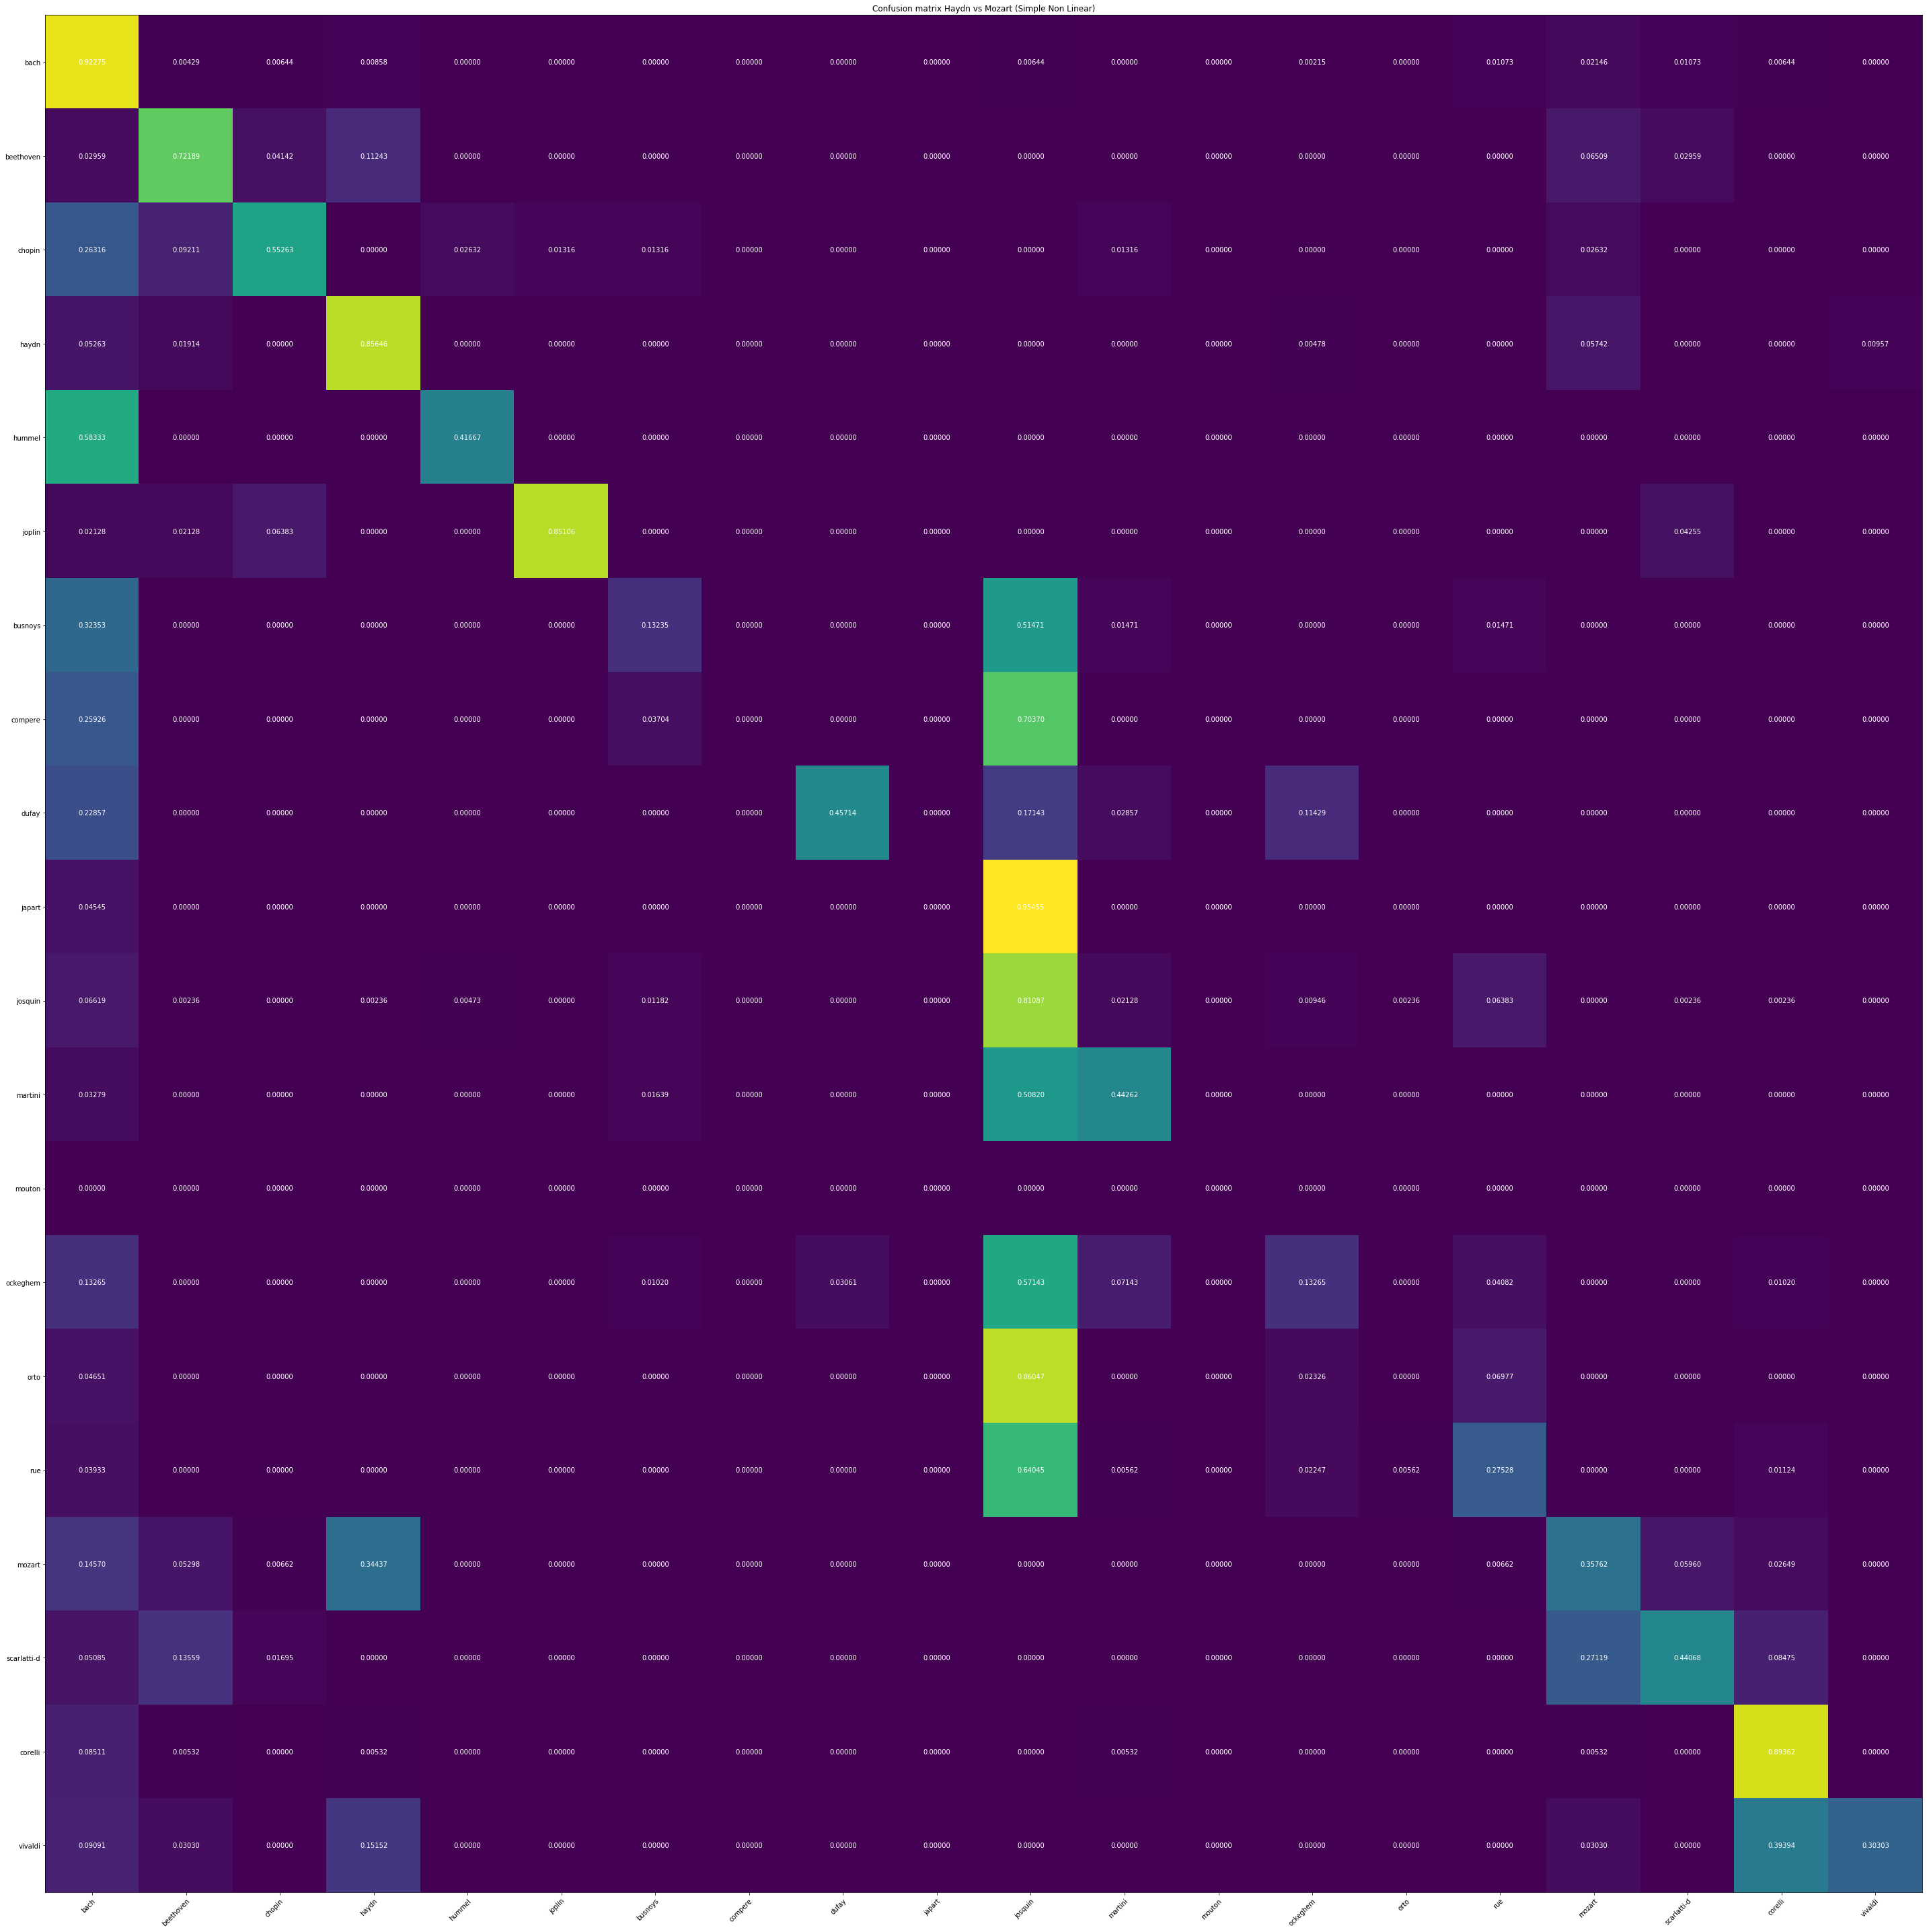

bach 47 / 52 = 0.9038461538461539
beethoven 20 / 25 = 0.8
busnoys 2 / 14 = 0.14285714285714285
chopin 6 / 13 = 0.46153846153846156
compere 0 / 9 = 0.0
corelli 25 / 26 = 0.9615384615384616
dufay 2 / 8 = 0.25
haydn 27 / 29 = 0.9310344827586207
hummel 1 / 6 = 0.16666666666666666
japart 0 / 4 = 0.0
joplin 9 / 11 = 0.8181818181818182
josquin 41 / 45 = 0.9111111111111111
martini 7 / 14 = 0.5
mozart 9 / 25 = 0.36
ockeghem 2 / 17 = 0.11764705882352941
orto 0 / 7 = 0.0
rue 7 / 25 = 0.28
scarlatti-d 6 / 14 = 0.42857142857142855
vivaldi 2 / 5 = 0.4
213 349 0.6103151862464183
Final real overall test accuracy: 0.6419196062346185 (1565/2438)
  bach: 0.9227467811158798 (430/466)
  beethoven: 0.7218934911242604 (122/169)
  chopin: 0.5526315789473685 (42/76)
  haydn: 0.8564593301435407 (179/209)
  hummel: 0.4166666666666667 (10/24)
  joplin: 0.851063829787234 (40/47)
  busnoys: 0.1323529411764706 (9/68)
  compere: 0.0 (0/27)
  dufay: 0.45714285714285713 (16/35)
  japart: 0.0 (0/22)
  josquin: 0.8108747

/home/harsh/composers/lib/CrossValidation.py:243: RuntimeWarning: invalid value encountered in double_scalars
  accuracy = correct / float(total_scores)


In [5]:
validator.run(context, checkpoint_dir=checkpoint_dir)

In [1]:
(265 + 184 + 181 + 181 + 184 + 184 + 183 + 175 + 188 + 170) / (361 + 239 + 239 + 239 + 239 + 239 + 239 + 239 + 239 + 239)

0.7543789808917197